<a href="https://colab.research.google.com/github/shreyasat27/PHM501-project/blob/main/EEG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></div><div class="lev2 toc-item"><a href="#Data-Structure" data-toc-modified-id="Data-Structure-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Data Structure</a></div><div class="lev2 toc-item"><a href="#import-libraries" data-toc-modified-id="import-libraries-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>import libraries</a></div><div class="lev3 toc-item"><a href="#System-Specifications." data-toc-modified-id="System-Specifications.-121"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>System Specifications.</a></div><div class="lev1 toc-item"><a href="#Data-Extraction" data-toc-modified-id="Data-Extraction-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Extraction</a></div><div class="lev2 toc-item"><a href="#Declare-paths-to-data-location" data-toc-modified-id="Declare-paths-to-data-location-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Declare paths to data location</a></div><div class="lev2 toc-item"><a href="#Parse-Data" data-toc-modified-id="Parse-Data-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Parse Data</a></div><div class="lev2 toc-item"><a href="#Functions-for-parsing-data" data-toc-modified-id="Functions-for-parsing-data-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Functions for parsing data</a></div><div class="lev2 toc-item"><a href="#Create-Subject-files-and-store-as-pickle-files" data-toc-modified-id="Create-Subject-files-and-store-as-pickle-files-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Create Subject files and store as pickle files</a></div><div class="lev1 toc-item"><a href="#Data-Analysis" data-toc-modified-id="Data-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Analysis</a></div><div class="lev2 toc-item"><a href="#Working-with-a-single-Alcoholic-and-control-subject-file" data-toc-modified-id="Working-with-a-single-Alcoholic-and-control-subject-file-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Working with a single Alcoholic and control subject file</a></div><div class="lev3 toc-item"><a href="#Making-surface-Plots" data-toc-modified-id="Making-surface-Plots-311"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Making surface Plots</a></div><div class="lev3 toc-item"><a href="#Making-Heatmaps" data-toc-modified-id="Making-Heatmaps-312"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Making Heatmaps</a></div><div class="lev2 toc-item"><a href="#Creating-Headmaps" data-toc-modified-id="Creating-Headmaps-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Creating Headmaps</a></div><div class="lev2 toc-item"><a href="#Calculating-correlations" data-toc-modified-id="Calculating-correlations-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Calculating correlations</a></div><div class="lev2 toc-item"><a href="#The-big-picture" data-toc-modified-id="The-big-picture-34"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>The big picture</a></div><div class="lev1 toc-item"><a href="#ML-to-predict-subject-behaviour." data-toc-modified-id="ML-to-predict-subject-behaviour.-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>ML to predict subject behaviour.</a></div><div class="lev1 toc-item"><a href="#Conclusion" data-toc-modified-id="Conclusion-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusion</a></div>

# Introduction  
This data arises from a large study to examine EEG correlates of genetic predisposition to alcoholism. It contains measurements from 64 electrodes placed on the scalp sampled at 256 Hz (3.9-msec epoch) for 1 second.


There were two groups of subjects: alcoholic and control. Each subject was exposed to either a single stimulus (S1) or to two stimuli (S1 and S2) which were pictures of objects chosen from the 1980 Snodgrass and Vanderwart picture set. When two stimuli were shown, they were presented in either a matched condition where S1 was identical to S2 or in a non-matched condition where S1 differed from S2.

<br>

<p>
There were 122 subjects and each subject completed 120 trials where different stimuli were shown. The electrode positions were located at standard sites (Standard Electrode Position Nomenclature, American Electroencephalographic Association 1990). Zhang et al. (1995) describes in detail the data collection process.
This module provides classes and utilities for working with the UCI EEG database located at
http://archive.ics.uci.edu/ml/datasets/EEG+Database. There are 122 subjects total in the dataset,
and for each there is multivariate time series data for about 80-120 trials. In each trial the
subject has a 64 channel scalp EEG placed on his head and one second's worth of data (sampled at
256 Hz, i.e., 256 samples/second) is recorded after the subject is shown one of three visual
stimuli. Each trial, then, is a 64 channel by 256 sample time series.
</p>

## Data Structure
This module assumes you have downloaded and untarred the **eeg_full.tar file**, which produces a
folder with the following structure:
    
     eeg_full/
        co2a0000364/
            co2a0000364.rd.000.gz
            co2a0000364.rd.002.gz
            co2a0000364.rd.007.gz
            ...
            ...
       co2c0000337/
           co2c0000337.rd.000.gz
           co2c0000337.rd.002.gz
           co2c0000337.rd.016.gz
           ...
           ...
Each subdirectory of eeg_full is a subject, and each gzipped text file is a trial. The second
character in the directory name ("a" or "c") indicates whether the subject is a member of the
alcoholic or control group. Three digits at the end of the trial file name (000-120) indicate
the trial number.
Each trial file has the following structure:

    [filename minus trial number and extension]
    [experimental info (IGNORED)]
    [sampling rate (IGNORED)]
    [stimulus type] , [trial #]
    [channel name] chan [channel number]
    [channel number] [channel name] [timestamp] measurement
    [channel number] [channel name] [timestamp] measurement
    [channel number] [channel name] [timestamp] measurement
    ...
    [channel name] chan [channel number]
    [channel number] [channel name] [timestamp] measurement
    [channel number] [channel name] [timestamp] measurement
    [channel number] [channel name] [timestamp] measurement
    ...
<br>

**An example being:**

    co2a0000364.rd
    120 trials, 64 chans, 416 samples 368 post_stim samples
    3.906000 msecs uV
    S1 obj , trial 0
    FP1 chan 0
    0 FP1 0 -8.921
    0 FP1 1 -8.433
    0 FP1 2 -2.574
    ...
    FP2 chan 1
    0 FP2 0 0.834
    0 FP2 1 3.276
    0 FP2 2 5.717
    ...



## import libraries

In [2]:
import csv
import gzip
import os
import glob
import pickle
import re
import sys
import time
import multiprocessing as mp         # for handling multi-processing applications
import platform
!pip install mpld3

from tqdm import tnrange, tqdm_notebook

import numpy as np
from IPython.core.pylabtools import figsize
from IPython.display import clear_output
figsize(8, 8)
import mpld3                       # uncomment these lines for interactive graphs
mpld3.enable_notebook()
from pandas import DataFrame, Series # how to import something from another module into current namespace
import pandas as pd
import cv2

# Libraries for plotting
## plot figures inside the notebook
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('ggplot')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.2/201.2 kB 2.6 MB/s eta 0:00:00


### System Specifications.

In [3]:
def print_sysinfo():

    print('\nPython version  :', platform.python_version())
    print('compiler        :', platform.python_compiler())

    print('\nsystem     :', platform.system())
    print('release    :', platform.release())
    print('machine    :', platform.machine())
    print('processor  :', platform.processor())
    print('CPU count  :', mp.cpu_count())
    print('interpreter:', platform.architecture()[0])
    print('\n\n')

In [4]:
print_sysinfo()


Python version  : 3.10.12
compiler        : GCC 11.4.0

system     : Linux
release    : 5.15.120+
machine    : x86_64
processor  : x86_64
CPU count  : 2
interpreter: 64bit





In [5]:
import pandas as pd

In [6]:
df = pd.read_csv("D:\ML Projects\EEG\eeg_csv\co2a0000364\co2a0000364_0.csv")

FileNotFoundError: ignored

In [ ]:
df

trial_num chan_name  epoch  voltage  alcholic       sub_id stimulus
0              0       FP1      0   -8.921      True  co2a0000364  S1 obj 
1              0       FP1      1   -8.433      True  co2a0000364  S1 obj 
2              0       FP1      2   -2.574      True  co2a0000364  S1 obj 
3              0       FP1      3    5.239      True  co2a0000364  S1 obj 
4              0       FP1      4   11.587      True  co2a0000364  S1 obj 
5              0       FP1      5   14.028      True  co2a0000364  S1 obj 
6              0       FP1      6   11.587      True  co2a0000364  S1 obj 
7              0       FP1      7    6.704      True  co2a0000364  S1 obj 
8              0       FP1      8    1.821      True  co2a0000364  S1 obj 
9              0       FP1      9   -1.109      True  co2a0000364  S1 obj 
10             0       FP1     10   -2.085      True  co2a0000364  S1 obj 
11             0       FP1     11   -1.597      True  co2a0000364  S1 obj 
12             0       FP1     12    0.356      True  co2a0000364  S1 obj 
13             0       FP1     13    2.309      True  co2a0000364  S1 obj 
14             0       FP1     14    2.797      True  co2a0000364  S1 obj 
15             0       FP1     15    2.309      True  co2a0000364  S1 obj 
16             0       FP1     16    0.356      True  co2a0000364  S1 obj 
17             0       FP1     17   -0.132      True  co2a0000364  S1 obj 
18             0       FP1     18   -0.132      True  co2a0000364  S1 obj 
19             0       FP1     19    0.356      True  co2a0000364  S1 obj 
20             0       FP1     20    0.844      True  co2a0000364  S1 obj 
21             0       FP1     21    1.333      True  co2a0000364  S1 obj 
22             0       FP1     22    2.797      True  co2a0000364  S1 obj 
23             0       FP1     23    6.215      True  co2a0000364  S1 obj 
24             0       FP1     24    9.633      True  co2a0000364  S1 obj 
25             0       FP1     25   10.610      True  co2a0000364  S1 obj 
26             0       FP1     26    6.704      True  co2a0000364  S1 obj 
27             0       FP1     27   -0.621      True  co2a0000364  S1 obj 
28             0       FP1     28   -5.992      True  co2a0000364  S1 obj 
29             0       FP1     29   -6.480      True  co2a0000364  S1 obj 
...          ...       ...    ...      ...       ...          ...      ...
16354          0         Y    226   15.361      True  co2a0000364  S1 obj 
16355          0         Y    227   19.755      True  co2a0000364  S1 obj 
16356          0         Y    228   21.708      True  co2a0000364  S1 obj 
16357          0         Y    229   20.243      True  co2a0000364  S1 obj 
16358          0         Y    230   15.361      True  co2a0000364  S1 obj 
16359          0         Y    231   11.943      True  co2a0000364  S1 obj 
16360          0         Y    232   12.919      True  co2a0000364  S1 obj 
16361          0         Y    233   17.314      True  co2a0000364  S1 obj 
16362          0         Y    234   21.220      True  co2a0000364  S1 obj 
16363          0         Y    235   22.196      True  co2a0000364  S1 obj 
16364          0         Y    236   20.732      True  co2a0000364  S1 obj 
16365          0         Y    237   18.290      True  co2a0000364  S1 obj 
16366          0         Y    238   17.802      True  co2a0000364  S1 obj 
16367          0         Y    239   17.802      True  co2a0000364  S1 obj 
16368          0         Y    240   17.314      True  co2a0000364  S1 obj 
16369          0         Y    241   14.872      True  co2a0000364  S1 obj 
16370          0         Y    242   12.431      True  co2a0000364  S1 obj 
16371          0         Y    243   13.407      True  co2a0000364  S1 obj 
16372          0         Y    244   17.802      True  co2a0000364  S1 obj 
16373          0         Y    245   23.173      True  co2a0000364  S1 obj 
16374          0         Y    246   24.150      True  co2a0000364  S1 obj 
16375          0         Y    24

# Data Extraction

The data files are in a nested zip file format. The code is writen assuming that all the individual subjects are unzipped. The following code snippet does that.

    import tarfile
    data_dir = os.listdir('path to eeg_full dir')
    for subjectfile in data_dir:
        filename = 'path to eeg_full dir' + subjectfile
        tar = tarfile.open(filename)
        tar.extractall(path='eeg_subjects/')
        tar.close()


## Declare paths to data location

In [ ]:
main_dir = "C:\\Users\HARSHIT\Downloads\Capstone Project_Tomin"
eeg_data = os.path.join(main_dir+'\eeg_subjects')  # unzipped subjects data file location
""" The raw data is of the form of zipped folders. This code assumes that the individual subject folders
    are unzipped while the trial files inside them are zipped. """

subject_files = os.listdir(eeg_data) # list all the subject folders

## Parse Data

The following function will extract relevant parameters from each of the trial files belonging to the subject.
The extracted files are stored in .csv format.

In [ ]:
def extract_info(filename):
    """ Function to parse individual trial details for a subject.
        Args:
        filename - The name of file to be parsed

        Return:
        subject_id - The subject ID of the subject
        alcoholic - Return True for alcoholic subject
        stimulus  - Returns the stimulus for a particular trial
        trial_num - Trial number of the subject. On average there is 90 trial files per
                    subject"""

    with gzip.open(filename, 'rt') as f:
        reader = csv.reader(f)
        for idx, row in enumerate(reader):
            if idx == 0:
                m = re.match('# (co\d(a|c)\d\d\d\d\d\d\d)', row[0])  #match pattern for the subject name
                                                                     #contains 'a' for alcoholics
                                                                     #and 'c' for control
                subject_id = m.group(1)
                alcoholic = (m.group(2) == 'a')
            if idx == 3:
                m = re.match('# (.*?) trial (\d+)', row[0] + row[1]) #matching trial number
                stimulus = re.sub('\W', ' ', m.group(1))
                trial_num = int(m.group(2))
            #if idx == 4:
                #m = re.match('# (.*?) chan (\d+)', row[0])
                #chan_name = re.sub('\W', '', m.group(1))
                #chan_no = int(m.group(2))
    return subject_id, alcoholic, stimulus,trial_num

In [ ]:
def create_csv(subject_folder, main_dir, verbosity):
    """
        This function reads in individual trial files of subject folder, stacks the data
        in the form of a dataframe object and writes them out as CSV files.

        Args:
        subject_folder: The folder containing all the unzipped trial files of a subject
        main_dir: The main directory path to the data location
        verbosity: Pass a number greater than 1 for more output details

        Return:
        None
    """
    data_dir = main_dir + '\eeg_subjects'+'\\'+subject_folder
    print('##########################################################')
    print('Beginning extraction of subject ', str(subject_folder))
    trial_dir = os.listdir(data_dir)
    trial_files = [file_i for file_i in trial_dir if file_i.endswith('.gz')]

    print('There are ', len(trial_files), 'trials under this subject')
    for file_no, file in enumerate(trial_files):
        tic = time.time()
        filename = data_dir +'\\' + file
        df = pd.DataFrame()
        if verbosity == 0:
            print('Beginning extraction from file ', filename)

        sub_id, whether_alc, what_stimulus, trial_no = extract_info(filename)
        if verbosity > 1:
            print('Beginning extraction of file: ', filename)
            print('Subject id:', sub_id, ' Trial No: ', trial_no)
        with gzip.open(filename, 'rt') as f:
            reader = csv.reader(f, delimiter=' ')
            for idx, row in enumerate(reader):
                if row[0] != '#':
                    df = df.append(pd.DataFrame([row],columns=list(['trial_num', 'chan_name', 'epoch','voltage'])))


            df = pd.concat([df,pd.DataFrame(columns=['subject_id', 'stimulus', 'alcoholic'])],
                           ignore_index=True)
            df[['subject_id', 'stimulus','alcoholic']] = [sub_id, what_stimulus, whether_alc]

            out_name = main_dir + '\eeg_csv'+'\\' + sub_id + '_' + str(
                    trial_no) + '.csv'
            df.to_csv(out_name, index=False, sep='\t', encoding='utf-8')
            toc = time.time()

            if verbosity == 0:
                print('CSV file saved as ', out_name)
            elif verbosity > 1:
                print('There are ', df.shape[0], ' rows and ', df.shape[1],
                        ' columns in this dataframe object')
                print('CSV file successully saved as ', out_name)
                print('It will take %f mins more for this subject!' %
                        round(((len(trial_files) - float(file_no+1)) * float((toc - tic) / 60.0)),2))
                print('-------------------------------------------------------------------------------')
    print('All files extracted and saved.')
    print('###########################################################')
    return None


Start extraction of files for each subject. The extracted files will saved as csv files in the disk.
<br>
The code proceeds only if files are missing. If all the files are satisfied the code prints the information
with the number of trial files per subject.
<br>
**NOTE**: Subject co2c0000367 has error flags in the trial files and hence is avoided from the study.

**IMP**: DO NOT RUN THIS CELL IF YOU DON'T WANT TO PARSE THE DATA(OR IF YOU DON'T HAVE THE FOLDER WITH ALL THE PARSED FILE IN THE DISK).
<br>
**THIS WILL TAKE A LONG TIME TO EXECUTE.**

In [ ]:
len_trialfiles = []
for folder in subject_files:
    os.chdir(eeg_data+'\\'+folder)
    zipped_files = [zipfile for zipfile in glob.glob(folder+'*.gz')]
    os.chdir(main_dir+'\\'+"eeg_(csv&pkl)")
    files = [file for file in glob.glob(folder+'*.csv')]
    len_trialfiles.append(len(zipped_files))
    ## check if all files are already extracted or not.
    if len(files) < len(zipped_files):
        create_csv(folder, main_dir, verbosity=5)
    else:
        print('All files satisfied for subject',folder,'; There are',len(files),'files.')

## Functions for parsing data

In [ ]:
def concat_df(sorted_files,verbosity):

    """
        Function to join together trial files belonging to a single subject
        and returns a dataframe object containing all the trials."""

    result = pd.DataFrame()
    for sorted_file in sorted_files:
        df = pd.read_csv(sorted_file, delim_whitespace=False, sep='\t',
                         index_col = False)
        chan_names = df.chan_name.unique()
        if verbosity >1:
            print('File loaded {}'.format((sorted_file.split('/')[5])))
        trial_voltage = []
        norm_voltage = []
        Norm_voltage =[]
        for chan in chan_names:
            #norm_voltage = []
            voltages = []
            chan_df = pd.DataFrame()
            chan_df = df.loc[df['chan_name'] == chan]
            voltages = chan_df[['voltage']].values
            max_volt = max(voltages)
            min_volt = min(voltages)
            voltages = [x/abs(max_volt) if (x>0) else x for x in voltages]            #rescale voltage values to range [-1,1]
            voltages = [x/abs(min_volt) if (x<0) else x for x in voltages]
            norm_voltage.extend(voltages)
            Norm_voltage = np.asarray(norm_voltage)
        trial_voltage = np.concatenate(Norm_voltage, axis=0)
        df['norm_voltage'] = pd.Series(trial_voltage, index=df.index)
        result = result.append(df, ignore_index=True)

    return result

In [ ]:
def sort_files(dir_path,sub_id):
    """
        Function sorts trial files under a subject folder in ascending order of trial number.
    """

    files = [file for file in glob.glob(dir_path+sub_id+'_[0-9]*.csv')]
    # sorting assumes that the file directory structure for a single trial file is of the format
    # '/home/user/eeg_data/eeg_csv/co2a0000372_107.csv'. If not change the position
    # and character used in the following line.
    sorted_files = sorted(files, key=lambda x: int((x.split('.')[0]).split('_')[3]))

    return sorted_files

In [ ]:
from pathlib import Path
import os.path
def create_SubCSV(sub_files):
    """
        This function calls the concat_df function and joins together indivdual trial files
        of the subject if the file does not exist. The dataframe object is written to disk as
        a pickle object.
    """
    out_dir = main_dir+'\\'+'eeg_(csv&pkl)'
    os.chdir(out_dir)
    for subject in sub_files:
        outname = subject+'_full.pkl'
        file = Path(out_dir+outname)
        try:
            file_path = file.resolve()
            print('File exists '+outname+'. Continue.')

        except FileNotFoundError:
            print('File does not exists '+outname+'. Begin.')
            sorted_files = sort_files(out_dir,subject)
            sub_df = concat_df(sorted_files,5)
            sub_df.to_pickle(outname)


## Create Subject files and store as pickle files
Create full subject files and store them to disk as pickle files for easy and fast access later.

In [ ]:
os.chdir(eeg_data)
alcoholics = [file for file in glob.glob('co?a*')]
controls = [file for file in glob.glob('co?c*')]
create_SubCSV(controls)
create_SubCSV(alcoholics)

File exists co2c0000337_full.pkl. Continue.
File exists co2c0000338_full.pkl. Continue.
File exists co2c0000339_full.pkl. Continue.
File exists co2c0000340_full.pkl. Continue.
File exists co2c0000341_full.pkl. Continue.
File exists co2c0000342_full.pkl. Continue.
File exists co2c0000344_full.pkl. Continue.
File exists co2c0000345_full.pkl. Continue.
File exists co2c0000346_full.pkl. Continue.
File exists co2c0000347_full.pkl. Continue.
File exists co2c0000348_full.pkl. Continue.
File exists co2c0000351_full.pkl. Continue.
File exists co2c0000352_full.pkl. Continue.
File exists co2c0000354_full.pkl. Continue.
File exists co2c0000355_full.pkl. Continue.
File exists co2c0000356_full.pkl. Continue.
File exists co2c0000357_full.pkl. Continue.
File exists co2c0000359_full.pkl. Continue.
File exists co2c0000362_full.pkl. Continue.
File exists co2c0000363_full.pkl. Continue.
File exists co2c0000364_full.pkl. Continue.
File exists co2c0000367_full.pkl. Continue.
File exists co2c0000370_full.pkl

# Data Analysis

There are two categories of subjects - Alcoholics and Control. List all alcoholics and control subjects in a separate list for ease of plotting.
<br>



In [ ]:
print('There are {} alcoholic and {} control subjects'.format(str(len(alcoholics)),str(len(controls))))

There are 77 alcoholic and 45 control subjects


The first kind of plot we'll be looking at it will be a surface plot depicting voltage variation across all the channels for a particular stimulus for one subject each from Alcoholics and Control.

In [ ]:
os.chdir(main_dir+'\\'+'pkl_files')

In [ ]:
alcoholic_sub = alcoholics[4]+'_full.pkl'       ## initialize the file
control_sub = controls[4]+'_full.pkl'
al_df = pd.read_pickle(alcoholic_sub)           ## load into memory as a dataframe object
co_df = pd.read_pickle(control_sub)

## Working with a single Alcoholic and control subject file

In [ ]:
al_df.head(50)           ## display first 50 rows of alcoholic subject

alcoholic chan_name  epoch stimulus   subject_id  trial_num  voltage  \
0        True       FP1      0  S1 obj   co2a0000370          0    2.970   
1        True       FP1      1  S1 obj   co2a0000370          0    3.459   
2        True       FP1      2  S1 obj   co2a0000370          0    5.900   
3        True       FP1      3  S1 obj   co2a0000370          0    9.806   
4        True       FP1      4  S1 obj   co2a0000370          0   13.224   
5        True       FP1      5  S1 obj   co2a0000370          0   12.736   
6        True       FP1      6  S1 obj   co2a0000370          0    9.806   
7        True       FP1      7  S1 obj   co2a0000370          0    6.388   
8        True       FP1      8  S1 obj   co2a0000370          0    4.435   
9        True       FP1      9  S1 obj   co2a0000370          0    5.412   
10       True       FP1     10  S1 obj   co2a0000370          0    6.388   
11       True       FP1     11  S1 obj   co2a0000370          0    6.388   
12       True       FP1     12  S1 obj   co2a0000370          0    4.924   
13       True       FP1     13  S1 obj   co2a0000370          0    3.947   
14       True       FP1     14  S1 obj   co2a0000370          0    3.947   
15       True       FP1     15  S1 obj   co2a0000370          0    5.900   
16       True       FP1     16  S1 obj   co2a0000370          0    6.877   
17       True       FP1     17  S1 obj   co2a0000370          0    5.900   
18       True       FP1     18  S1 obj   co2a0000370          0    3.459   
19       True       FP1     19  S1 obj   co2a0000370          0    0.041   
20       True       FP1     20  S1 obj   co2a0000370          0   -2.401   
21       True       FP1     21  S1 obj   co2a0000370          0   -2.889   
22       True       FP1     22  S1 obj   co2a0000370          0   -1.912   
23       True       FP1     23  S1 obj   co2a0000370          0    0.041   
24       True       FP1     24  S1 obj   co2a0000370          0    2.970   
25       True       FP1     25  S1 obj   co2a0000370          0    6.388   
26       True       FP1     26  S1 obj   co2a0000370          0   10.783   
27       True       FP1     27  S1 obj   co2a0000370          0   14.201   
28       True       FP1     28  S1 obj   co2a0000370          0   14.201   
29       True       FP1     29  S1 obj   co2a0000370          0   11.759   
30       True       FP1     30  S1 obj   co2a0000370          0    7.365   
31       True       FP1     31  S1 obj   co2a0000370          0    2.482   
32       True       FP1     32  S1 obj   co2a0000370          0   -0.448   
33       True       FP1     33  S1 obj   co2a0000370          0   -1.912   
34       True       FP1     34  S1 obj   co2a0000370          0   -1.912   
35       True       FP1     35  S1 obj   co2a0000370          0   -0.936   
36       True       FP1     36  S1 obj   co2a0000370          0    0.529   
37       True       FP1     37  S1 obj   co2a0000370          0    1.506   
38       True       FP1     38  S1 obj   co2a0000370          0    2.482   
39       True       FP1     39  S1 obj   co2a0000370          0    2.970   
40       True       FP1     40  S1 obj   co2a0000370          0    2.482   
41       True       FP1     41  S1 obj   co2a0000370          0    1.994   
42       True       FP1     42  S1 obj   co2a0000370          0    1.506   
43       True       FP1     43  S1 obj   co2a0000370          0    1.506   
44       True       FP1     44  S1 obj   co2a0000370          0    1.017   
45       True       FP1     45  S1 obj   co2a0000370          0    1.017   
46       True       FP1     46  S1 obj   co2a0000370          0    1.994   
47       True       FP1     47  S1 obj   co2a0000370          0    3.947   
48       True       FP1     48  S1 obj   co2a0000370          0    5.900   
49       True       FP1     49  S1 obj   co2a0000370          0    6.877   

    norm_voltage  
0       0.209140  
1       0.243574  
2       0.415464  
3       0.690515  
4       0.931202  
5       0.896

In [ ]:
co_df.head(50)     ##display first 50 rows of the control subject

alcoholic chan_name  epoch stimulus   subject_id  trial_num  voltage  \
0       False       FP1      0  S1 obj   co2c0000341          0   -6.073   
1       False       FP1      1  S1 obj   co2c0000341          0   -5.096   
2       False       FP1      2  S1 obj   co2c0000341          0   -3.632   
3       False       FP1      3  S1 obj   co2c0000341          0   -1.678   
4       False       FP1      4  S1 obj   co2c0000341          0   -1.678   
5       False       FP1      5  S1 obj   co2c0000341          0   -3.143   
6       False       FP1      6  S1 obj   co2c0000341          0   -5.096   
7       False       FP1      7  S1 obj   co2c0000341          0   -6.561   
8       False       FP1      8  S1 obj   co2c0000341          0   -6.073   
9       False       FP1      9  S1 obj   co2c0000341          0   -4.608   
10      False       FP1     10  S1 obj   co2c0000341          0   -1.678   
11      False       FP1     11  S1 obj   co2c0000341          0    0.763   
12      False       FP1     12  S1 obj   co2c0000341          0    2.228   
13      False       FP1     13  S1 obj   co2c0000341          0    1.740   
14      False       FP1     14  S1 obj   co2c0000341          0    0.763   
15      False       FP1     15  S1 obj   co2c0000341          0   -2.167   
16      False       FP1     16  S1 obj   co2c0000341          0   -5.585   
17      False       FP1     17  S1 obj   co2c0000341          0   -8.514   
18      False       FP1     18  S1 obj   co2c0000341          0   -8.514   
19      False       FP1     19  S1 obj   co2c0000341          0   -5.096   
20      False       FP1     20  S1 obj   co2c0000341          0    0.275   
21      False       FP1     21  S1 obj   co2c0000341          0    5.157   
22      False       FP1     22  S1 obj   co2c0000341          0    6.622   
23      False       FP1     23  S1 obj   co2c0000341          0    4.181   
24      False       FP1     24  S1 obj   co2c0000341          0   -0.214   
25      False       FP1     25  S1 obj   co2c0000341          0   -3.143   
26      False       FP1     26  S1 obj   co2c0000341          0   -3.632   
27      False       FP1     27  S1 obj   co2c0000341          0   -3.632   
28      False       FP1     28  S1 obj   co2c0000341          0   -4.120   
29      False       FP1     29  S1 obj   co2c0000341          0   -5.096   
30      False       FP1     30  S1 obj   co2c0000341          0   -5.096   
31      False       FP1     31  S1 obj   co2c0000341          0   -3.143   
32      False       FP1     32  S1 obj   co2c0000341          0    1.251   
33      False       FP1     33  S1 obj   co2c0000341          0    5.157   
34      False       FP1     34  S1 obj   co2c0000341          0    6.134   
35      False       FP1     35  S1 obj   co2c0000341          0    3.204   
36      False       FP1     36  S1 obj   co2c0000341          0   -0.702   
37      False       FP1     37  S1 obj   co2c0000341          0   -3.632   
38      False       FP1     38  S1 obj   co2c0000341          0   -4.120   
39      False       FP1     39  S1 obj   co2c0000341          0   -1.678   
40      False       FP1     40  S1 obj   co2c0000341          0    1.740   
41      False       FP1     41  S1 obj   co2c0000341          0    4.669   
42      False       FP1     42  S1 obj   co2c0000341          0    7.111   
43      False       FP1     43  S1 obj   co2c0000341          0    9.064   
44      False       FP1     44  S1 obj   co2c0000341          0   10.529   
45      False       FP1     45  S1 obj   co2c0000341          0   10.529   
46      False       FP1     46  S1 obj   co2c0000341          0    9.064   
47      False       FP1     47  S1 obj   co2c0000341          0    7.599   
48      False       FP1     48  S1 obj   co2c0000341          0    6.134   
49      False       FP1     49  S1 obj   co2c0000341          0    5.157   

    norm_voltage  
0      -0.267828  
1      -0.224741  
2      -0.160176  
3      -0.074002  
4      -0.074002  
5      -0.138

There are three different stimulus applied during the various trials.

In [ ]:
stimulus = ['S1 obj ', 'S2 nomatch', 'S2 match ']
# declare stimulus beforehand instead of finding it from the dataframe since
# we need to remove S2 error flagged entries.
al_df.stimulus.unique()

array(['S1 obj ', 'S2 nomatch', 'S2 nomatch err', 'S2 match ',
       'S2 match err '], dtype=object)

### Making surface Plots

Create plots to show variations in voltage with respect to channels and time.

In [ ]:
def make_matrix(df_obj,trial_num=5):
    """
        This function returns voltage values in the form of matrix with shape
        64 X 256, corresponding to 64 channels.
        Args:
        df_obj: Dataframe object containing all the trial information
        trial_num: The trial number for which the plot need to be made
        Return:
        z with shape (64,256) containing the voltages for the trial
    """
    df = df_obj.loc[(df_obj["trial_num"] == trial_num)]
    chan_names = df_obj.chan_name.unique()
    z=[]
    for idx,chanel in enumerate(chan_names):
        voltages_values = df.loc[df['chan_name']== chanel]['norm_voltage'].values
        z.append(voltages_values)
    z = np.asarray(z)
    return z.reshape(64,256)

def make_surface_plot(X,Y,Z_al,Z_co,figtit):
    """
    Make surface plots with a colormap representing
    the voltage values
    """
    fig = plt.figure()
    #fig.colorbar(surf1,shrink=0.5, aspect=5)
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    X, Y = np.meshgrid(X, Y)
    surf = ax.plot_surface(X,Y, Z_al, cmap='RdBu_r',
                           linewidth=0, antialiased=False)
    ax.set_xlabel('epoch')
    ax.set_ylabel('channels')
    ax.set_zlabel('Voltages(micro volts)')
    ax.text2D(0.05,0.95, "Alcoholic "+figtit,transform=ax.transAxes)

    #fig.colorbar(surf, shrink=0.5, aspect=5)

    ax.view_init(elev=40., azim=320)

    ax1 = fig.add_subplot(1, 2, 2, projection='3d')

    surf1 = ax1.plot_surface(X,Y, Z_co, cmap='RdBu_r',
                           linewidth=0, antialiased=False)
    ax1.set_xlabel('epoch')
    ax1.set_ylabel('channels')
    ax1.set_zlabel('Voltages(micro volts)')
    ax1.text2D(0.05,0.95, "Control "+figtit,transform=ax1.transAxes)
    ax1.view_init(elev=40., azim=320)
    #fig.colorbar(surf1,shrink=0.5, aspect=5)
    cax = fig.add_axes([0.49, 0.1, 0.03, 0.8])
    fig.colorbar(surf1,cax=cax)
    fig.set_size_inches(20,8)
    plt.show()


The surface plot to indicate voltage variation in a single trial ie; a single recording

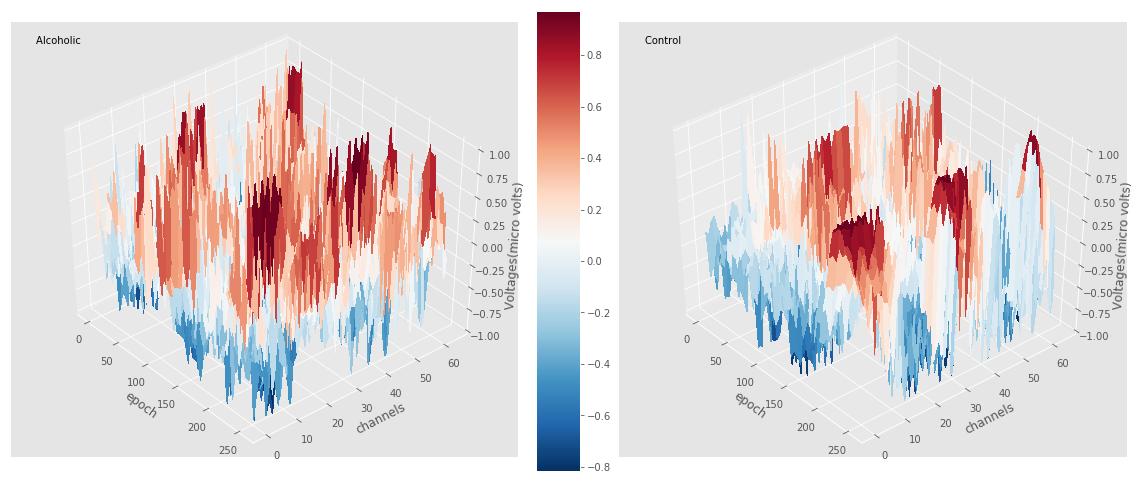

In [ ]:
X = np.arange(0, 256, 1)
Y = np.arange(0,64, 1)
Z_al = make_matrix(al_df)
Z_co = make_matrix(co_df)
make_surface_plot(X,Y,Z_al,Z_co,'')

The alcoholic subject shows greater positive voltages across all the channels compared to the control subject. However, this graph is not interactive. A plot which enables 3d rotation will help us understand the change in the voltage in much detail.
Plotly allows us to do that.

In [ ]:

def make_plotly_surface(X,Y,Z_al,Z_co,str_append):
    """Function to plot a interactive surface plot in Plotly. For this to work
       the computer should be online"""
    scene = dict(
        xaxis=dict(
            title='Epoch',
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            title='Channels',
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=False,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            title='Voltage(micro volts)',
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=False,
            backgroundcolor='rgb(230, 230,230)'
        )
    )
    graph_title='comparison of alcholics and control subjects'+str_append
    fig = tls.make_subplots(rows=1, cols=2,
                              specs=[[{'is_3d': True}, {'is_3d': True}]])
    fig.append_trace(dict(type='surface', x=X, y=Y, z=Z_al, colorscale='RdBu_r',
                          scene='scene1', showscale=False), 1, 1)
    fig.append_trace(dict(type='surface', x=X, y=Y, z=Z_co, colorscale='RdBu_r',
                          scene='scene2', showscale=True), 1, 2)
    fig['layout'].update(title=graph_title,
                         height=500, width=1200)
    fig['layout']['scene1'].update(scene,annotations=[
        dict(
            x=2,y=2,
            text='Alcoholic subject')
    ])
    fig['layout']['scene2'].update(scene,annotations=[
        dict(
            x=2,y=2,
            text='Control subject'
        )
    ])
    return fig

In the first surface plot, we plotted one single recording for Alcoholics and control. A much more sensible thing to do would be to average over all the trials containing a particular stimulus and make the same surface plot.

In [ ]:
def matrix_stimulus(df_obj,stimulus):
    """
        Returns averaged voltage in the form of a matrix across all
        the trials of a subject for one single stimulus
    """
    stimuli_df = df_obj.loc[df_obj['stimulus'] == stimulus ]

    chan_names = df_obj.chan_name.unique()
    Z = np.zeros((64,256))
    for epoch in range(0,255):
        epoch_df = stimuli_df.loc[stimuli_df['epoch'] == epoch]
        epoch_voltage=[]
        for chanel in chan_names:
            voltages_values = epoch_df.loc[epoch_df['chan_name']== chanel]['norm_voltage'].values
            mean_volt = sum(voltages_values)/len(voltages_values)
            epoch_voltage.append(mean_volt)
        Epoch_voltage = np.asarray(epoch_voltage)

        Z[:,epoch] = Epoch_voltage

    return Z


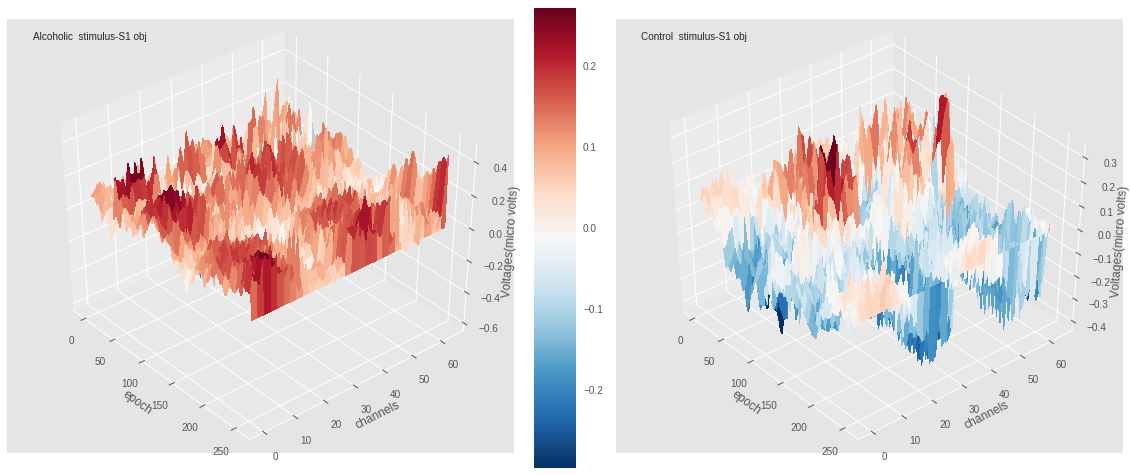

In [ ]:
X = np.arange(0, 256, 1)
Y = np.arange(0,64, 1)
Z_al = matrix_stimulus(al_df,'S1 obj ')
Z_co = matrix_stimulus(co_df,'S1 obj ')
make_surface_plot(X,Y,Z_al,Z_co,' stimulus-S1 obj')

Clearly there is well noticeable distinction between Alcoholics and control subjects for S1 obj stimulus.
<br>
Let us investigate further for other stimulus and see any such clear distinction exist or not.

In [ ]:
Z_al = matrix_stimulus(al_df,'S2 match ')
Z_co = matrix_stimulus(co_df,'S2 match ')

One major difference which is visible is that for the alcoholic subject there is a pickup in eeg voltages towards the end of the trial whereas for the control subject, we observe a steady decrease in most channels as time increases, except for few channels where a constant level is maintained.

### Making Heatmaps

Like the surface plots another informative illustration is to plot a heatmap graph of the voltages across different stimuli. This heatmap plots the averaged voltages for one subject each from the alcoholics and the control group across the entire set of trials.

/home/dhriti/anaconda3/envs/python3/lib/python3.5/site-packages/matplotlib/figure.py:1743: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.



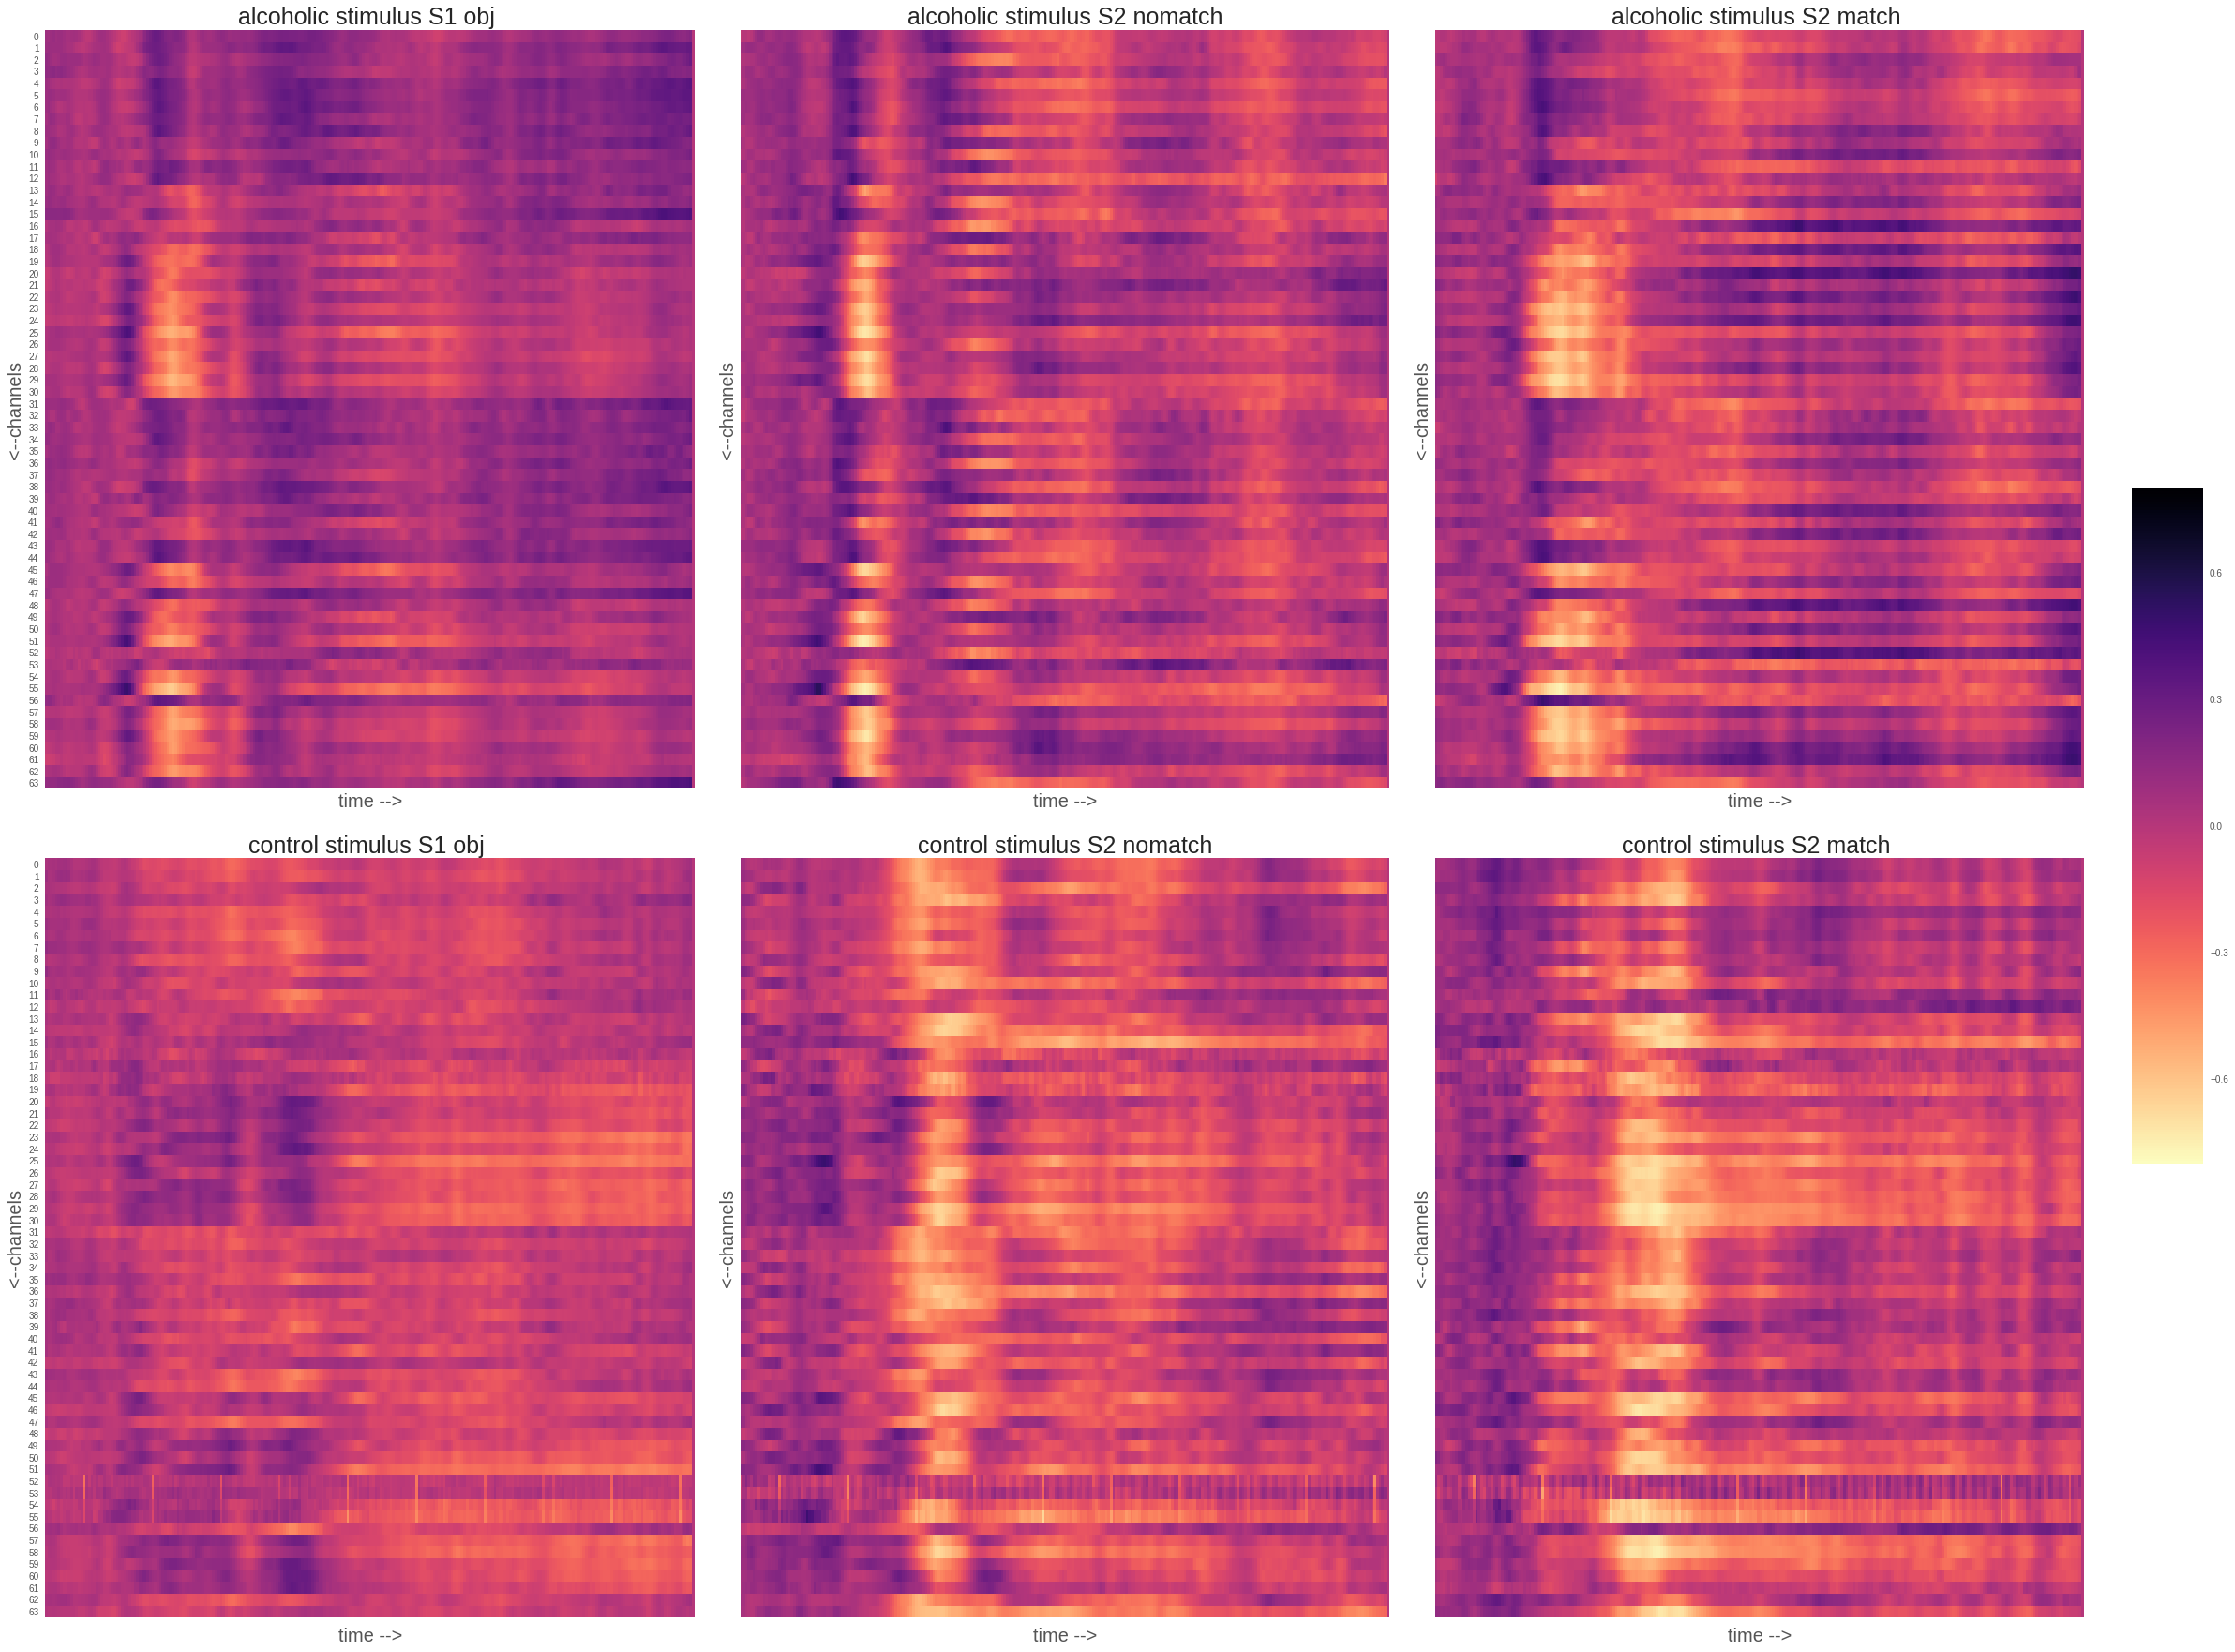

In [ ]:
fig, axes = plt.subplots(2,3,figsize=(35,25), sharex=True, sharey=True)
cbar_ax = fig.add_axes([.91, .3, .03, .4])

for i in range(6):
    if i>=3:
        df = co_df
        tit_str = 'control'
    elif i<3:
        df = al_df
        tit_str = 'alcoholic'
    row = i// 3
    col = i % 3
    ax_curr = axes[row,col]
    stimulus = ['S1 obj ', 'S2 nomatch', 'S2 match ','S1 obj ', 'S2 nomatch', 'S2 match ']
    Z = matrix_stimulus(df,stimulus[i])
    sns.set(font_scale=2)
    sns.heatmap(Z,ax=ax_curr, cmap='magma_r',vmin=-0.8 , vmax=0.8,label='big',
               cbar=i ==0,
               cbar_ax=None if i else cbar_ax)
    ax_curr.set_title(tit_str+' stimulus '+stimulus[i],fontsize=25)
    ax_curr.set(xticklabels=[])
    ax_curr.set_xlabel('time -->',size=20)
    ax_curr.set_ylabel('<--channels',size=20)
fig.tight_layout(rect=[0,0,.9,1])

We find stronger positive voltage in alcoholics in comparison with control subject across all the stimuli

## Creating Headmaps

Headmaps map the locations of the eeg electrodes to their respective locations on the head. By doing so we would get a much detailed information about the differences between the alcoholic subject and the control subject.  
<br>
Some questions to ask..
* Which areas of the brain react more strongly to each stimulus
* Are these areas different in the case of alcoholics and controls
* Which areas of the brain fire together after each stimulus

Load sensor locations and plot it in a 'top head' representation.

In [ ]:
sensor_location = (main_dir+'besa_81.txt')
f = open(sensor_location)
sensors = pd.read_csv(sensor_location, sep=',', header=None)
sensors.columns = ['chan_name','xx','yy','zz']
f.close()

In [ ]:
def label_point(x,y,val,ax):
    a = pd.concat({'x':x, 'y':y, 'val':val}, axis=1)
    for i,point in a.iterrows():
        ax.text(point['x'],point['y'],str(point['val']))

In [ ]:
import importlib
importlib.reload(plt)
sns.set(font_scale=0.9)
fig = plt.figure(figsize=(7,7.5))
ax1 = sensors.set_index('yy')['xx'].plot(style='o')
label_point(sensors.yy,sensors.xx,sensors.chan_name,ax1)
plt.axis([-1.5,1.5,-1.5,1.5])
earX_left=[-0.985,-0.995,-1.0,-1.1,-1.1,-1.0,-0.995,-0.985]
earY_left=[0.25,0.25,0.24,0.18,-0.18,-0.24,-0.25,-0.25]
earX_right=[0.965,0.985,1.0,1.1,1.1,1.0,0.985,0.965]
earY_right=[0.25,0.25,0.24,0.18,-0.18,-0.24,-0.25,-0.25]
noseX = [-0.10,-0.05,0.00,0.05,0.10]
noseY = [1.0,1.1,1.2,1.1,1.0]
plt.plot(earX_left,earY_left,earX_right,earY_right,noseX,noseY,color='k',linewidth = 3)
circ = plt.Circle((0,0), radius=1, fc='y',color='k', fill=False, linewidth = 3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('TOP OF HEAD')
plt.text(-1.2,-0.3,'Left')
plt.text(1.05,-0.3,'Right')
plt.text(0,1.2,'Nasion')
plt.gca().add_patch(circ)
plt.show()

In the above diagram, 61 electrodes are marked, showing their positions over a headmap. Out of 64 original electrodes from the data, the positions of electrodes 'X','Y' and 'nd' could not be ascertained and hence they are omitted. For the rest of the section, we will only take information from 61 electrodes present here and ignore the other three.

In [ ]:
import scipy.interpolate
#create x,y mesh for the image.
def interpolate_mesh(sensorData,z):
    """This function will take the voltage across the channels
        and map them into electrode postions to create a interpolated
        2D color map"""
    x = sensorData.yy
    y = sensorData.xx
    xi,yi = np.linspace(-1, 1, 100), np.linspace(-1, 1, 100)
    x0,y0,radius = 0.0,0.0,0.90
    xi,yi = np.meshgrid(xi,yi)
    r = np.sqrt((xi-x0)**2 + (yi-y0)**2)
    inside  = r<radius
    rbf = scipy.interpolate.Rbf(x,y,z, function='linear')
    zi = rbf(xi[inside],yi[inside])
    return inside,xi,yi,zi

In [ ]:
def plot_head(ax,mask,xx,yy,zz,stimuli_name,sensorData,MIN=None,MAX=None):
    """This function will plot the interpolated colormap over the headmap
        for three different stimulus"""
    if MIN and MAX is None:
        MIN=-1
        MAX=1
    ax.scatter(xx[mask],yy[mask],c=zz,cmap='RdBu_r',vmin=MIN,vmax=MAX)
    #plt.axis([-1.5,1.5,-1.5,1.5])
    earX_left=[-0.985,-0.995,-1.0,-1.1,-1.1,-1.0,-0.995,-0.985]
    earY_left=[0.25,0.25,0.24,0.18,-0.18,-0.24,-0.25,-0.25]
    earX_right=[0.965,0.985,1.0,1.1,1.1,1.0,0.985,0.965]
    earY_right=[0.25,0.25,0.24,0.18,-0.18,-0.24,-0.25,-0.25]
    noseX = [-0.10,-0.05,0.00,0.05,0.10]
    noseY = [1.0,1.1,1.2,1.1,1.0]
    ax.plot(earX_left,earY_left,earX_right,earY_right,noseX,noseY,color='k',linewidth = 2)
    circ = plt.Circle((0,0), radius=1, fc='y',color='k', fill=False, linewidth = 2)
    ax.add_artist(circ)
    x = sensorData.yy
    y = sensorData.xx
    ax.scatter(x,y,color='k',s=3)
    ax.set_ylim([-1.5,1.5])
    ax.set_xlim([-1.5,1.5])
    ax.set_title(stimuli_name)
    ax.set(xticklabels=[])
    ax.set(yticklabels=[])

In [ ]:
def avgVolt_stimulus(df_obj,sensorData,epoch_no):
    """This function averages the voltages across all the trials with the same stimulus
        for a single epoch"""
    epoch_df = df_obj.loc[df_obj['epoch'] == epoch_no]
    epoch_voltage = []
    chan_names = sensorData.chan_name.unique()
    norm_voltage = []
    subID = df_obj.iloc[0]['subject_id']
    stimulus = ['S1 obj ', 'S2 match ','S2 nomatch']
    for stimuli in stimulus:
        stimuli_df = epoch_df.loc[epoch_df['stimulus'] == stimuli]
        for chanel in chan_names:
            voltages_values = stimuli_df.loc[stimuli_df['chan_name']== chanel]['voltage'].values
            mean_volt = sum(voltages_values)/len(voltages_values)
            epoch_voltage.append(mean_volt)
    epoch_voltage = np.asarray(epoch_voltage)
    epoch_voltage = epoch_voltage.reshape(61,3)

    return epoch_voltage,subID

In [ ]:
import matplotlib.gridspec as gridspec


def heatmap_headmap(df_obj,sensorData,epoch_no):
        """Function to create plots for each of the 256 epochs. Each plot
           will create a heatmap showing voltages for the three stimulus
           and a headmap showing voltages across three stimulus
        """
        voltmatrix,subID = avgVolt_stimulus(df_obj,sensorData,epoch_no)

        fig = plt.figure(1,figsize=(6.5,5.5))
        gridspec.GridSpec(3,3)

        #1
        plt.subplot2grid((3,3),(0,0), colspan=2,rowspan=3)
        ax = sns.heatmap(voltmatrix, xticklabels=stimulus,cmap='RdBu_r', vmin=-1, vmax=1)
        ax.set(yticklabels=[])
        ax.set(xlabel='stimulus', ylabel='<-- channels')
        ax.set_title('sub '+str(subID)+' Epoch '+str(epoch_no).zfill(3))
        #2
        ax1 = plt.subplot2grid((3,3),(0,2))
        mask,xi,yi,zi = interpolate_mesh(sensorData,voltmatrix[:,0])
        snapPlots = plot_head(ax1,mask,xi,yi,zi,stimulus[0],sensorData)
        #3
        ax2 = plt.subplot2grid((3,3),(1,2))
        mask,xi,yi,zi = interpolate_mesh(sensorData,voltmatrix[:,1])
        snapPlots = plot_head(ax2,mask,xi,yi,zi,stimulus[1],sensorData)
        #4
        ax3 = plt.subplot2grid((3,3),(2,2))
        mask,xi,yi,zi = interpolate_mesh(sensorData,voltmatrix[:,2])
        snapPlots = plot_head(ax3, mask,xi,yi,zi,stimulus[2],sensorData)

        fig.tight_layout()
        fig.savefig(subID+'_Epoch_eegSensors_'+str(epoch_no).zfill(4)+'.png')

In [ ]:
def headmap_stacked(df_obj_al,df_obj_co,sensorData,epoch):
    """
        Call previous functions to create the final product.
    """

    voltmatrix_al,subID = avgVolt_stimulus(df_obj_al,sensorData,epoch)
    voltmatrix_co,subID = avgVolt_stimulus(df_obj_co,sensorData,epoch)
    stimulus = ['S1 obj ', 'S2 match ','S2 nomatch']
    fig,axes = plt.subplots(2,3,figsize=(7,5), sharex=True, sharey=True)
    for idx in range(6):
        row = idx// 3
        col = idx % 3
        if row >= 1:
            mask,xi,yi,zi = interpolate_mesh(sensorData,voltmatrix_co[:,col])
            snapPlots = plot_head(axes[row,col],mask,xi,yi,zi,'control '+stimulus[col],sensors)
        elif row < 1:
            mask,xi,yi,zi = interpolate_mesh(sensorData,voltmatrix_al[:,col])
            snapPlots = plot_head(axes[row,col],mask,xi,yi,zi,'alcoholic '+stimulus[col],sensors)



    fig.suptitle('Alcoholic and Control headmaps Epoch '+str(epoch).zfill(4))
    fig.tight_layout(rect=[0,0.03,1,0.95])

    fig.savefig('headmapStack_'+str(epoch).zfill(4)+'.png')
    fig.clear()

Following plots show what the above functions plot.

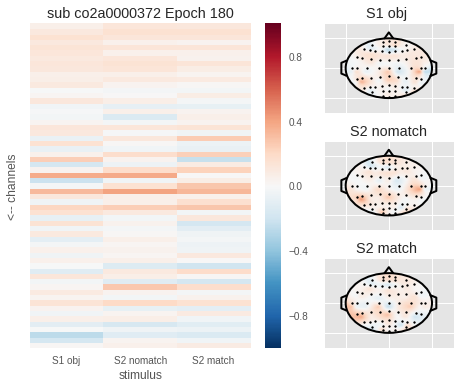

In [ ]:
# test run for epoch 180
os.chdir(main_dir+"plots")
heatmap_headmap(al_df,sensors,180)

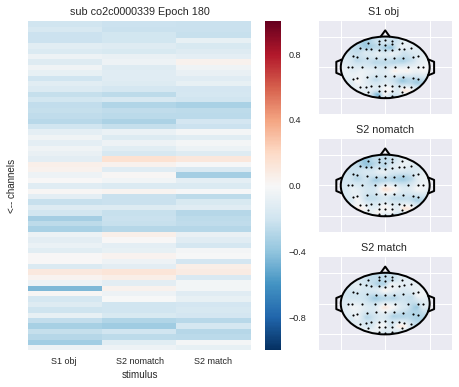

In [ ]:
heatmap_headmap(co_df,sensors,180)

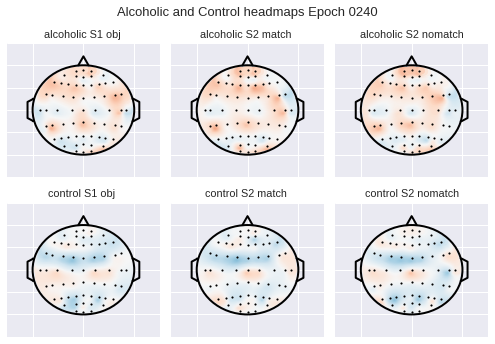

In [ ]:
headmap_stacked(al_df,co_df,sensors,240)

In [ ]:
def make_video(outvid,dir_path,images, outimg=None, fps=5, size=None,
               is_color=True, format="XVID"):
    """
    Create a video from a list of images.

    @param      outvid      output video
    @param      images      list of images to use in the video
    @param      fps         frame per second
    @param      size        size of each frame
    @param      is_color    color
    @param      format      see http://www.fourcc.org/codecs.php
    @return                 see http://opencv-python-tutroals.readthedocs.org/en/latest/py_tutorials/py_gui/
                                          py_video_display/py_video_display.html

    The function relies on http://opencv-python-tutroals.readthedocs.org/en/latest/.
    By default, the video will have the size of the first image.
    It will resize every image to this size before adding them to the video.
    """
    from cv2 import VideoWriter, VideoWriter_fourcc, imread, resize
    fourcc = VideoWriter_fourcc(*format)
    vid = None
    for image in images:
        image = dir_path + '/'+image
        if not os.path.exists(image):
            raise FileNotFoundError(image)
        img = imread(image)
        if vid is None:
            if size is None:
                size = img.shape[1], img.shape[0]
            vid = VideoWriter(outvid, fourcc, float(fps), size, is_color)
        if size[0] != img.shape[1] and size[1] != img.shape[0]:
            img = resize(img, size)
        vid.write(img)
    vid.release()
    return vid

In [ ]:
os.chdir(main_dir+"plots")
epochs = list(range(0,256))
for epoch in epochs:
    heatmap_headmap(al_df,sensors,epoch)

In [ ]:
os.chdir(main_dir+"plots")
epochs = list(range(0,256))
for epoch in epochs:
    heatmap_headmap(co_df,sensors,epoch)

In [ ]:
os.chdir(main_dir+"plots")
epochs = list(range(0,256))
for epoch in epochs:
    headmap_stacked(al_df,co_df,sensors,epoch)


Let's try to visualize the plots created for each epoch in the form of a slideshow.

In [ ]:
from matplotlib import animation, rc
from IPython.display import HTML
from PIL import Image

In [ ]:
def create_imarr(img_path):
    im_data = []
    for myFile in img_path:
        image = cv2.imread (myFile)
        im_data.append (image)
    return im_data

In [ ]:
os.chdir(main_dir+"plots")
import IPython_display

# animate object using matplotlib animate
def plot_movie_js(image_array):
    dpi = 72.0
    xpixels, ypixels = image_array[0].shape[0], image_array[0].shape[1]
    fig = plt.figure(figsize=(ypixels/dpi, xpixels/dpi), dpi=dpi)
    im = plt.figimage(image_array[0])

    def animate(i):
        im.set_array(image_array[i])
        return (im,)

    anim = animation.FuncAnimation(fig, animate, frames=len(image_array))
    display(IPython_display.display_animation(anim))

In [ ]:
def sort_images(images,split_no):
    sorted_images = sorted(images, key=lambda x: int((x.split('.')[0]).split('_')[split_no]))
    return sorted_images

In [ ]:
images_al = [file for file in glob.glob('co2a0000372_Epoch_eegSensors_*')]
sorted_images_al = sort_images(images_al)
im_arr_al = create_imarr(sorted_images)

In [ ]:
#plot_movie_js(im_arr_al)

In [ ]:
images_co = [file for file in glob.glob('co2c0000339_Epoch_eegSensors_*')]
sorted_images_co = sort_images(images_co)
im_arr_co = create_imarr(sorted_images_co)

In [ ]:
#plot_movie_js(im_arr_co)

In [ ]:
images_ = [file for file in glob.glob('headmapStack_*')]
sorted_images = sorted(images_, key=lambda x: int((x.split('.')[0]).split('_')[1]))
im_arr_ = create_imarr(sorted_images)

In [ ]:
#plot_movie_js(im_arr_)

---

## Calculating correlations

As can be seen from the slideshow, some channels appear to be more correlated than others. A correlation is an indication that
those two parts of the brain fire together. It is important to know whether this characteristic show any marked differences in alcoholic and control group.

In [ ]:
def create_chanMat(df_obj,stimulus):
    """This function takes a dataframe object containing data about
        one subject and creates a voltage matrix for one stimulus"""
    chan_names = df_obj.chan_name.unique()
    chan_volts = pd.DataFrame()
    stimuli_df = df_obj.loc[df_obj['stimulus'] == stimulus]
    for chan in chan_names:
        norm_voltage = []
        voltages = []
        chan_df = pd.DataFrame()
        chan_df = stimuli_df.loc[stimuli_df['chan_name'] == chan]
        norm_voltages = chan_df[['norm_voltage']].values
        norm_voltage = np.concatenate(norm_voltages, axis=0)
        chan_volts[chan] = pd.Series(norm_voltage)

    return chan_volts

In [ ]:
chanMat_al = create_chanMat(al_df,'S1 obj ')
chanMat_al.head(10)

FP1       FP2        F7        F8       AF1       AF2        FZ  \
0 -0.314311  0.030817 -0.472870  0.149475 -0.546564  0.016384 -0.419958   
1 -0.314311  0.030817 -0.367516  0.157891 -0.546564 -0.428321 -0.275022   
2 -0.189583  0.081849 -0.226900  0.183157 -0.416954 -0.428321 -0.275022   
3 -0.064981  0.132828 -0.121546  0.233689 -0.287477  0.016384  0.006106   
4 -0.002553  0.132828 -0.121546  0.309470 -0.157867  0.147519  0.064535   
5 -0.064981  0.107339 -0.226900  0.351586 -0.157867  0.278654  0.122965   
6 -0.127282  0.107339 -0.262090  0.343152 -0.222605  0.344256  0.122965   
7 -0.064981  0.132828 -0.297208  0.275788 -0.287477  0.278654  0.122965   
8  0.020855  0.183860 -0.226900  0.191573 -0.287477  0.213120  0.064535   
9  0.086137  0.183860 -0.156664  0.132625 -0.287477  0.147519  0.064535   

         F4        F3       FC6    ...          PO7       PO8       FCZ  \
0  0.144288 -0.468797  0.452587    ...    -0.547607  1.000000  0.076875   
1  0.144288 -0.336098  0.423792    ...    -0.246114  0.944539 -0.076875   
2  0.103563 -0.136914  0.279696    ...     0.004333  0.778043 -0.076875   
3  0.103563  0.072503  0.106863    ...     0.170263  0.445051 -0.076875   
4  0.144288  0.227006 -0.028259    ...     0.170263  0.278668 -0.076875   
5  0.266544  0.072503  0.049212    ...     0.087256  0.223094 -0.076875   
6  0.388801 -0.070564  0.193309    ...     0.045794  0.278668 -0.076875   
7  0.511057 -0.136914  0.423792    ...     0.045794  0.334129 -0.076875   
8  0.551782 -0.136914  0.625479    ...     0.045794  0.167633  0.076875   
9  0.470333 -0.136914  0.654275    ...    -0.044982 -0.032655  0.179374   

        POZ        OZ        P2        P1       CPZ        nd         Y  
0  0.150500  0.188901  1.000000  0.085186  0.082655 -0.130476  0.021058  
1  0.221256  0.225821  0.916837  0.268049 -0.084053  0.092455  0.033682  
2  0.221256  0.336429  0.750850  0.329128 -0.084053  0.226903  0.058944  
3  0.150500  0.373273  0.501701  0.390082 -0.267167  0.260498  0.077893  
4  0.079600  0.373273  0.335544  0.390082 -0.267167  0.226903  0.084205  
5  0.079600  0.336429  0.418707  0.390082 -0.267167  0.159645  0.077893  
6  0.008844  0.299509  0.501701  0.390082 -0.084053  0.126050  0.084205  
7  0.079600  0.225821  0.584694  0.329128 -0.084053  0.126050  0.096843  
8  0.008844  0.152057  0.501701  0.329128 -0.084053  0.126050  0.115792  
9 -0.160862  0.004606  0.252551  0.268049 -0.267167  0.025196  0.122104  

[10 rows x 64 columns]

Create the same for control subject

In [ ]:
chanMat_co = create_chanMat(co_df,'S1 obj ')

Create a correlation matrix to show the correlations between different channel for a single stimulus. Here the correlations
of an alcoholic subject for 'S1 obj' stimulus is shown. Also printed out are the top 5 channel pairs with highest correlation index.

In [ ]:
plt.matshow(chanMat_al.corr())
plt.colorbar()
plt.title('Alcoholic subject')
plt.tight_layout
labels_to_drop = set()
cols = chanMat_al.columns
for ii in range(0, chanMat_al.shape[1]):
    for jj in range(0, ii+1):
        labels_to_drop.add((cols[ii], cols[jj]))
top_corr = chanMat_al.corr().abs().unstack()
top_corr = top_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
top_corr[:5]

O1   nd     0.997873
P8   P6     0.956078
FC5  FT7    0.955350
FZ   F1     0.953163
T7   C5     0.951103
dtype: float64

Let's see if the correlation among channels for a control subject is any different.

In [ ]:
plt.matshow(chanMat_co.corr())
plt.colorbar()
plt.title('Control subject')
labels_to_drop = set()
cols = chanMat_co.columns
for ii in range(0, chanMat_al.shape[1]):
    for jj in range(0, ii+1):
        labels_to_drop.add((cols[ii], cols[jj]))
top_corr = chanMat_co.corr().abs().unstack()
top_corr = top_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
top_corr[:5]

FP1  nd     0.997660
FP2  FPZ    0.954450
FZ   F1     0.953651
P8   P6     0.947144
F3   F1     0.937783
dtype: float64

Indeed,there is a clear difference in correlation between the alcoholics and control group. However this is for a single stimulus. Using networkx a graph can be constructed to better portray the correlations between different channels.

In [ ]:
def create_graph(df_mat,cutoff):
    corr_df = df_mat.corr()
    indices = np.where(corr_df>cutoff)
    indices = [(corr_df.index[x],corr_df.columns[y]) for x,y in zip(*indices)
                                        if x!=y and x<y ]
    return indices

In [ ]:
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout

In [ ]:
def draw_graph(graph,corr_df,graph_tit,ax):

    G=nx.Graph()
    G.add_edges_from(graph)
    # add edges
    for edge in graph:
        G.add_edge(edge[0], edge[1])

    graph_pos = nx.shell_layout(G)

    # draw nodes, edges and labels
    d = nx.degree(G)
    #nx.draw(G, nodelist=d.keys(),node_size=[v *100 for v in d.values()])
    values = [len(G.neighbors(node)) for node in G.nodes()]
    corr_values = [5 - (50*(1-corr_df.at[edge])) for edge in G.edges()]
    nx.draw_networkx_nodes(G, graph_pos,nodelist=d.keys(), node_size=[v*150 for v in d.values()],
                          cmap=plt.cm.coolwarm_r, node_color=values, alpha=0.3,ax=ax)
    nx.draw_networkx_edges(G, graph_pos, width=corr_values, alpha=0.3, edge_color='black',ax=ax)
    nx.draw_networkx_labels(G, graph_pos,nodelist=d.keys(),fs = d.values, font_size=9,
                            font_family='sans-serif',ax=ax,)
    ax.set_title(graph_tit)
    return graph_pos

<bound method Figure.tight_layout of <matplotlib.figure.Figure object at 0x7f5d13d45278>>

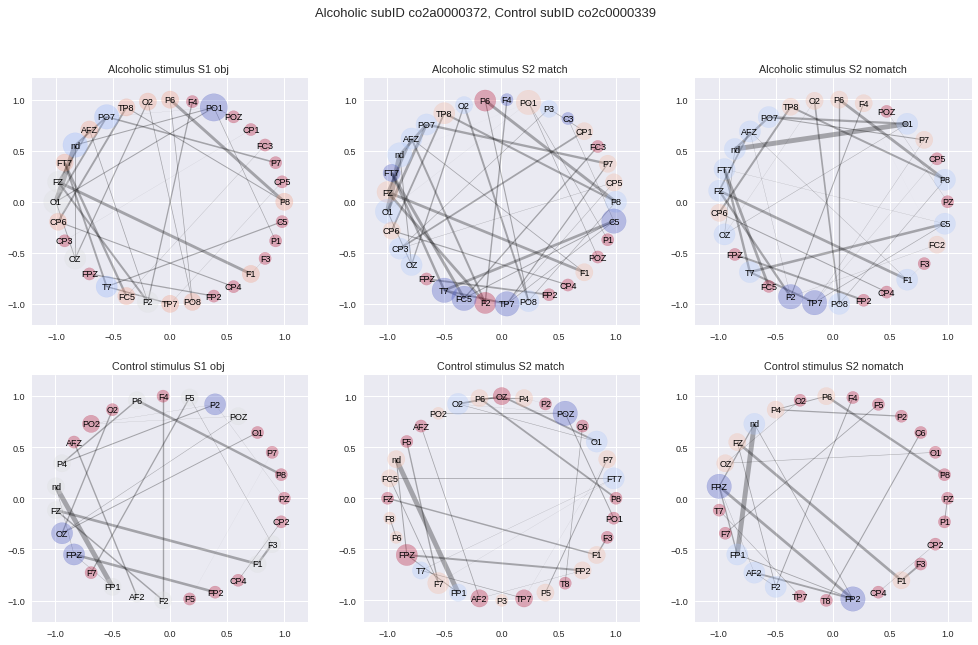

In [ ]:
stimulus = ['S1 obj ', 'S2 match ','S2 nomatch']
fig,ax = plt.subplots(nrows=2,ncols=3,figsize=(15,10))
for ii in range(3):
    chanMat_al = create_chanMat(al_df,stimulus[ii])
    chanMat_co = create_chanMat(co_df,stimulus[ii])
    graph_al = create_graph(chanMat_al,0.90)
    graph_co = create_graph(chanMat_co,0.90)
    G_al = draw_graph(graph_al,chanMat_al.corr(),'Alcoholic stimulus '+stimulus[ii],ax[0,ii])
    G_co = draw_graph(graph_co,chanMat_co.corr(),'Control stimulus '+stimulus[ii],ax[1,ii])
fig.suptitle('Alcoholic subID '+al_df.iloc[0]['subject_id']+', Control subID '+co_df.iloc[0]['subject_id'])
fig.tight_layout

Now let's see the same graph for another randomly selected subject from each group.

In [ ]:
os.chdir(main_dir+'/eeg_(csv&pkl)')
al_df1 = pd.read_pickle(alcoholics[10]+'_full.pkl')
co_df1 = pd.read_pickle(controls[10]+'_full.pkl')

<bound method Figure.tight_layout of <matplotlib.figure.Figure object at 0x7f5d14c0ceb8>>

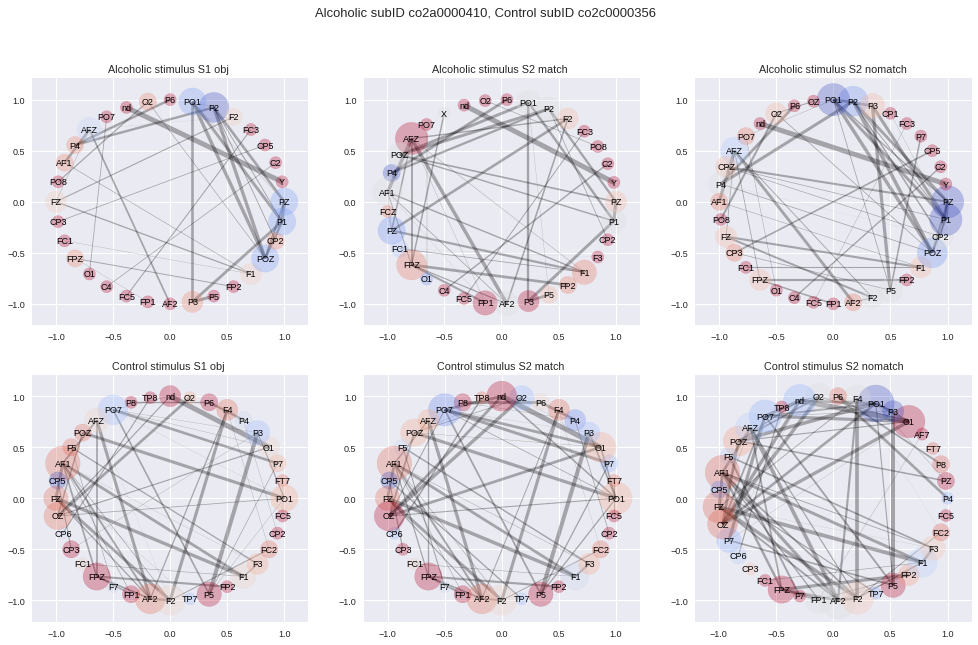

In [ ]:
stimulus = ['S1 obj ', 'S2 match ','S2 nomatch']
fig,ax = plt.subplots(nrows=2,ncols=3,figsize=(15,10))
for ii in range(3):
    chanMat_al = create_chanMat(al_df1,stimulus[ii])
    chanMat_co = create_chanMat(co_df1,stimulus[ii])
    graph_al = create_graph(chanMat_al,0.90)
    graph_co = create_graph(chanMat_co,0.90)
    G_al = draw_graph(graph_al,chanMat_al.corr(),'Alcoholic stimulus '+stimulus[ii],ax[0,ii])
    G_co = draw_graph(graph_co,chanMat_co.corr(),'Control stimulus '+stimulus[ii],ax[1,ii])
fig.suptitle('Alcoholic subID '+al_df1.iloc[0]['subject_id']+', Control subID '+co_df1.iloc[0]['subject_id'])
fig.tight_layout

The correlations do appear to be varied across different subjects. However we do see some common correlations which we can use later to in applying machine learning techniques.

## The big picture

Now we take a look at the entire dataset to see whether a substantial difference could be spotted between alcoholics and control. Let us create a function to randomly pick n number of files each from alcoholics subject group and control subject group.

In [ ]:
import random
def random_pickr(n_files,str_id):
    """
        This function will return a randomly collected sample of user defined number
        of files to be used in the analyis."""
    if str_id =='a':
        pkl_files_ = [file for file in glob.glob(main_dir+'eeg_(csv&pkl)/co?a*_full.pkl')]
    elif str_id =='c':
        pkl_files_ = [file for file in glob.glob(main_dir+'eeg_(csv&pkl)/co?c*_full.pkl')]
    else:
        print('No such group. Exiting.')
        return None

    random_idx = random.sample(range(0, len(pkl_files_) - 1),n_files)
    group_files_ = [pkl_files_[idx] for idx in random_idx ]
    return group_files_

For initial purposes let us pick five files each

In [ ]:
al_files_ = random_pickr(5,'a')
co_files_ = random_pickr(5,'c')

Now let us see how the average and standard deviation of voltage values vary across different channels for alcoholics and controls. For this we create a multi-dimensional array to store the values for each of the 5 subjects and each of the three stimuli.

In [ ]:
subID = al_df.iloc[0]['subject_id']
stimuli = ['S1 obj ', 'S2 match ','S2 nomatch']
mean_arr_al = np.zeros([5,64,3])
std_arr_al = np.zeros([5,64,3])
mean_arr_co = np.zeros([5,64,3])
std_arr_co = np.zeros([5,64,3])
for idx,(file1,file2) in enumerate(zip(al_files_,co_files_)):

    df_1 = pd.read_pickle(file1)
    df_2 = pd.read_pickle(file2)
    chan_names = df_1.chan_name.unique()
    for ii,stimulus in enumerate(stimuli):
        for jj,chanel in enumerate(chan_names):


            mean_arr_al[idx,jj,ii] = df_1.loc[(df_1['chan_name']== chanel)&(df_1['stimulus']== stimulus)]['voltage'].mean()
            std_arr_al[idx,jj,ii] = df_1.loc[(df_1['chan_name']== chanel)&(df_1['stimulus']== stimulus)]['voltage'].std()
            mean_arr_co[idx,jj,ii] = df_2.loc[(df_2['chan_name']== chanel)&(df_2['stimulus']== stimulus)]['voltage'].mean()
            std_arr_co[idx,jj,ii] = df_2.loc[(df_2['chan_name']== chanel)&(df_2['stimulus']== stimulus)]['voltage'].std()


Now plot the results.

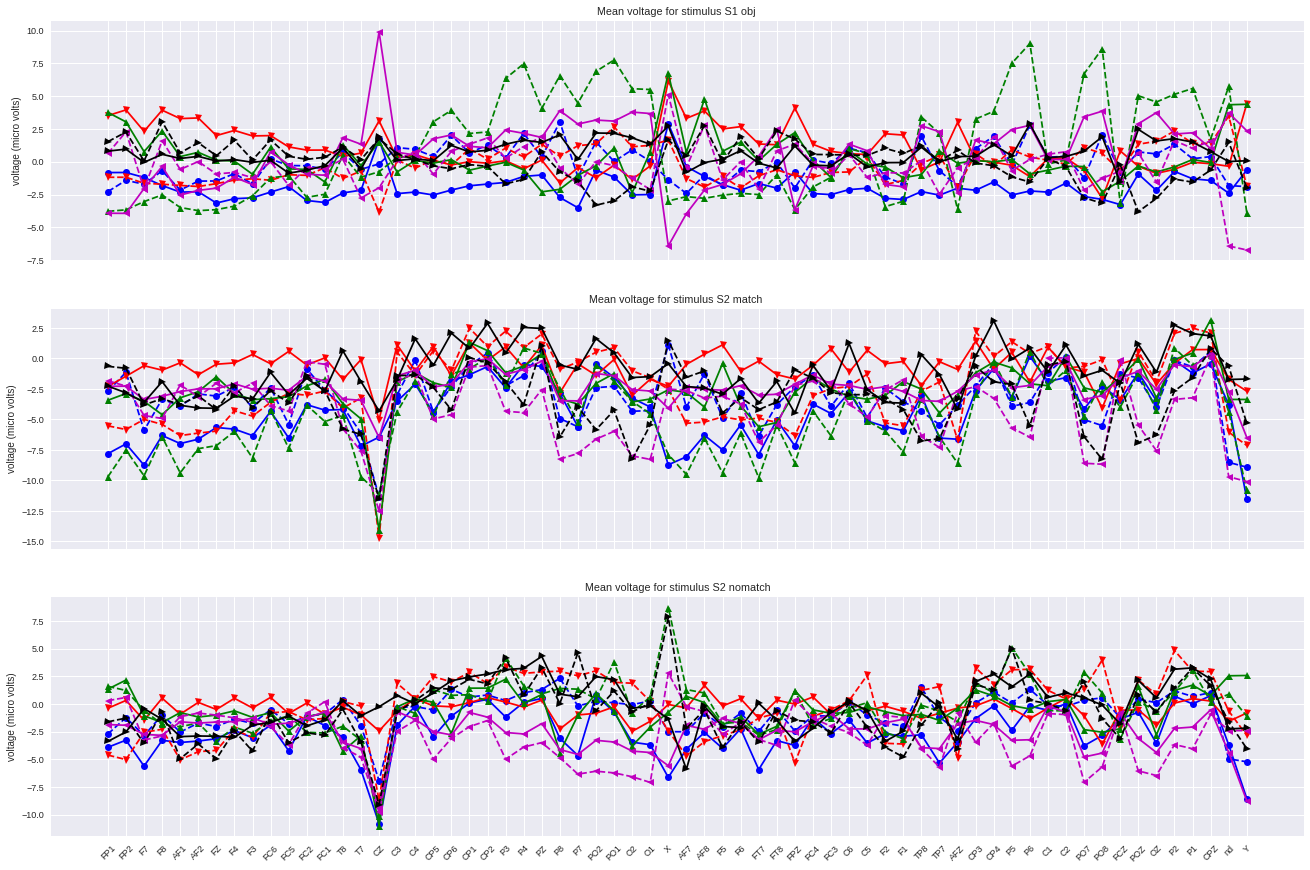

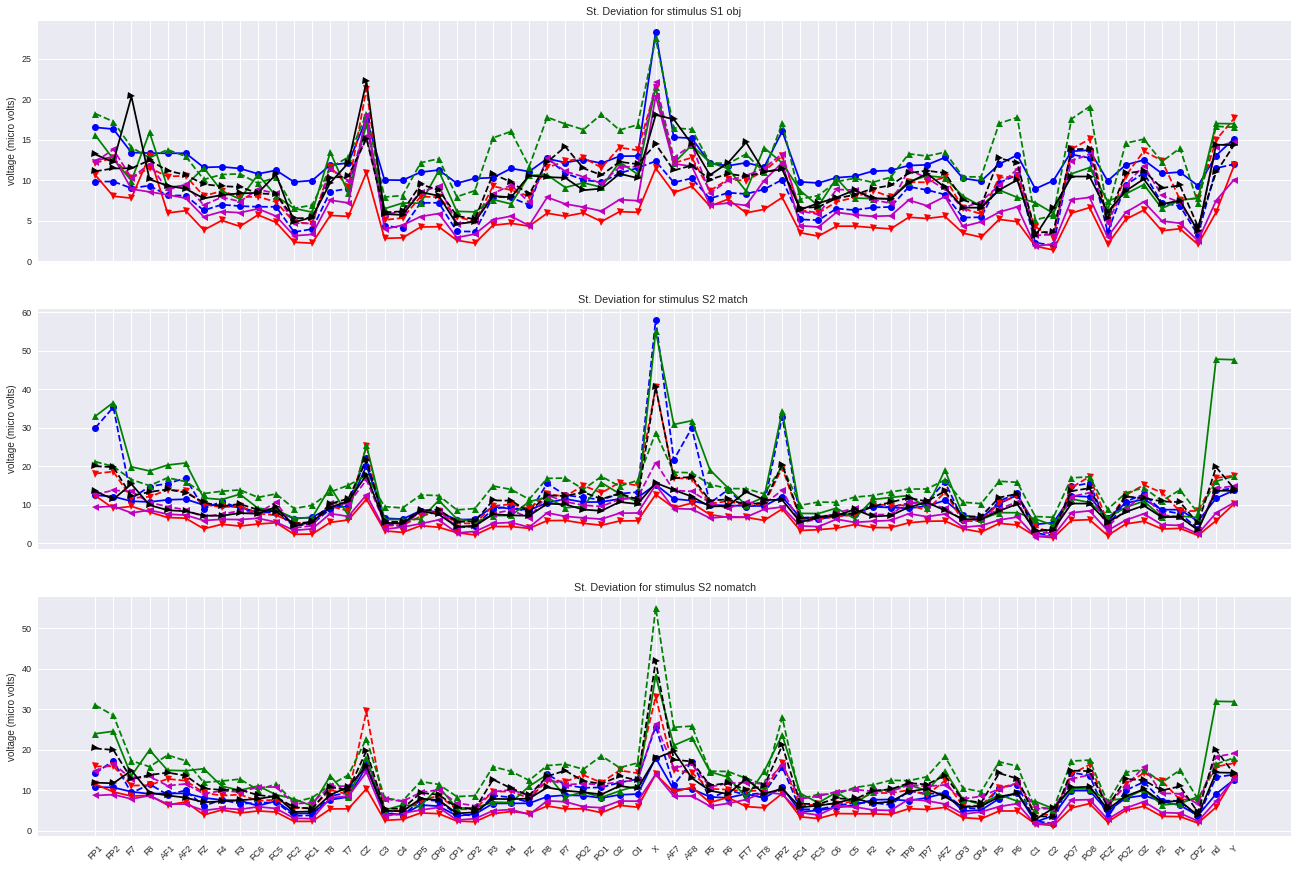

In [ ]:
x = list(range(0,64))
fig1,ax1 = plt.subplots(nrows=3,ncols=1,figsize=(20,15),sharex=True)
fig2,ax2 = plt.subplots(nrows=3,ncols=1,figsize=(20,15),sharex=True)
markers = ['o','v','^','<','>']
colors = ['b','r','g','m','k']
for idx in range(5):
    for kk in range(3):

        ax1[kk,].plot(x,mean_arr_al[idx,:,kk],linestyle='-',marker=markers[idx],color=colors[idx])
        ax2[kk,].plot(x,std_arr_al[idx,:,kk],linestyle='-',marker=markers[idx],color=colors[idx])
        ax1[kk,].set_xticks(x)
        ticks = ax1[kk,].get_xticks()
        ax1[kk,].set_xticklabels(chan_names,rotation=45)
        ax2[kk,].set_xticks(x)
        ticks = ax2[kk,].get_xticks()
        ax2[kk,].set_xticklabels(chan_names,rotation=45)
        ax1[kk,].set_title('Mean voltage for stimulus '+stimuli[kk])
        ax1[kk,].set_ylabel('voltage (micro volts)')
        ax2[kk,].set_title('St. Deviation for stimulus '+stimuli[kk])
        ax2[kk,].set_ylabel('voltage (micro volts)')

        ax1[kk,].plot(x,mean_arr_co[idx,:,kk],linestyle='--',marker=markers[idx],color=colors[idx])
        ax2[kk,].plot(x,std_arr_co[idx,:,kk],linestyle='--',marker=markers[idx],color=colors[idx])

plt.show()

The above plots show averaged voltage values across all the time points and across all the subjects for the five subjects.
Even though we see some variation in some channels nothing is too different for alcoholics and control subjects.

In [ ]:

stimuli = ['S1 obj ', 'S2 match ','S2 nomatch']
fig1,ax1 = plt.subplots(nrows=5,ncols=3,figsize=(50,15),sharex=True)
markers = ['o','v','^','<','>']
colors = ['b','r','g','m','k']
for idx,file in enumerate(al_files_):
    mean_arr = np.zeros([256,15])
    df_ = pd.read_pickle(file)
    chan_names = ['FP1','FPZ','AFZ','AF1','FZ','FCZ','FC4','C4','CPZ','CP4','P5','PZ','P1','PO2','FPZ','OZ']
    epochs = list(range(0,256))
    x = [ii*0.003905 for ii in list(range(0,256))]
    for ii,epoch in enumerate(epochs):
        for jj,chanel in enumerate(chan_names):


            voltages_mean = df_.loc[(df_['chan_name']== chanel)&(df_['stimulus']== 'S2 match ')&
                                    (df_['epoch']==epoch)]['voltage'].mean()
            mean_arr[ii,jj] = voltages_mean

    for kk in range(15):
        row = kk// 3
        col = kk % 3

        ax1[row,col].plot(x,mean_arr[:,kk],linestyle='-',marker=markers[idx],color=colors[idx])
        #ax1[row,col].set_xticks(x)
        ax1[row,col].set_title('Alcoholics '+'chanel '+chan_names[kk])
        ax1[row,col].set_xlabel('Seconds')
        ax1[row,col].set_ylabel('Voltage (micro volts)')
fig1.tight_layout()
plt.show()

In [ ]:
def multiD_array_Sub(stimuli_arr,epoch_arr,chans,al_subs,co_subs,nfiles):

    mean_arr1 = np.zeros((len(stimuli_arr),len(chans)*len(epoch_arr),nfiles))
    mean_arr2 = np.zeros((len(stimuli_arr),len(chans)*len(epoch_arr),nfiles))
    for ll,stimulus in enumerate(stimuli_arr):
        for jj,chanel in enumerate(chans):
            for idx,(file1,file2) in enumerate(zip(al_subs,co_subs)):
                df_1 = pd.read_pickle(file1)
                df_2 = pd.read_pickle(file2)
                for ii,epoch in enumerate(epoch_arr):
                    mean_arr1[ll,ii+(jj*len(epochs)),idx] = df_1.loc[(df_1['chan_name']== chanel)&
                                                                     (df_1['stimulus']== stimulus)&
                                                                     (df_1['epoch']==epoch)]['voltage'].mean()
                    mean_arr2[ll,ii+(jj*len(epochs)),idx] = df_2.loc[(df_2['chan_name']== chanel)&
                                                                     (df_2['stimulus']== stimulus)&
                                                                     (df_2['epoch']==epoch)]['voltage'].mean()


    return mean_arr1,mean_arr2

Select n random files from each group. We will carry out all the remaining analysis on the group of subjects selectively.

In [ ]:
stimuli = ['S1 obj ', 'S2 match ','S2 nomatch']
chan_names = ['FPZ','AFZ','AF1','FCZ','CPZ','PZ','P1','PO2','OZ','nd']
epochs = [5,10,20,30,60,80,100,140,160,170,180,200,240]
no_files = 40
al_files_ = random_pickr(no_files,'a')
co_files_ = random_pickr(no_files,'c')

In [ ]:
stimuli = ['S1 obj ', 'S2 match ','S2 nomatch']
fig2,ax2 = plt.subplots(nrows=5,ncols=3,figsize=(50,15),sharex=True)
markers = ['o','v','^','<','>']
colors = ['b','r','g','m','k']
for idx,file in enumerate(co_files_):
    mean_arr = np.zeros([256,15])
    df_ = pd.read_pickle(file)
    chan_names = ['FP1','FPZ','AFZ','FZ','FCZ','FC4','C4','CPZ','CP4','P5','PZ','P1','PO2','FPZ','OZ']
    epochs = list(range(0,256))
    x = [ii*0.003905 for ii in list(range(0,256))]
    for ii,epoch in enumerate(epochs):
        for jj,chanel in enumerate(chan_names):


            voltages_mean = df_.loc[(df_['chan_name']== chanel)&(df_['stimulus']== 'S2 match ')&
                                    (df_['epoch']==epoch)]['voltage'].mean()
            mean_arr[ii,jj] = voltages_mean

    for kk in range(15):
        row = kk// 3
        col = kk % 3

        ax2[row,col].plot(x,mean_arr[:,kk],linestyle='--',marker=markers[idx],color=colors[idx])
        #ax1[row,col].set_xticks(x)
        ax2[row,col].set_title('Control '+'chanel '+chan_names[kk])
        ax2[row,col].set_xlabel('Seconds')
        ax2[row,col].set_ylabel('Voltage (micro volts)')
fig2.tight_layout()
plt.show()

In [ ]:
chan_names = ['FP1','FPZ','AFZ','FZ','FCZ','FC4','C4','CPZ','CP4','P5','PZ','P1','PO2','nd','OZ']
stimuli = ['S1 obj ', 'S2 match ','S2 nomatch']
fig2,ax2 = plt.subplots(nrows=5,ncols=3,figsize=(30,15),sharex=True)
markers = ['o','v','^','<','>']
colors = ['b','r','g','m','k']
for kk in range(15):
    row = kk // 3
    col = kk % 3

    al,co = ax2[row,col].plot(x,mean_arr1[:,kk],'ro-',x,mean_arr2[:,kk],'bd-')

    #ax1[row,col].set_xticks(x)
    ax2[row,col].set_title('Alcoholic & Control '+'chanel '+chan_names[kk]+' stimulus S2 match ',fontsize =18)
    ax2[row,col].set_xlabel('time(seconds)',fontsize=15)
    ax2[row,col].set_ylabel('mean Voltage (micro volts)',fontsize=15)
fig2.legend((al,co),('Alcoholics','Control'),loc=(0.05,0.91),fontsize=16)
fig2.tight_layout()
plt.show()

Since reading each file individually for further analysis take up lot of computation resources, we will create a multi-dimensional array to store the voltages from the these subjects.

Create mean arrays for each of the 40 subjects. This data will be used to analysis of the p values and later to run ML algorithms.

In [ ]:
def create_meanArr(stimuli,chan_names,epochs,alFiles,coFiles):
    mean_arr1 = np.zeros((len(stimuli),len(chan_names)*len(epochs),len(alFiles)))
    mean_arr2 = np.zeros((len(stimuli),len(chan_names)*len(epochs),len(coFiles)))
    for idx,(file1,file2) in tqdm_notebook(enumerate(zip(alFiles,coFiles)),desc='Files completed',total=len(alFiles)):

        df_1 = pd.read_pickle(file1)
        df_2 = pd.read_pickle(file2)
        #print('loading file '+file1+' '+file2)
        for ll,stimulus in enumerate(stimuli):
            for jj,chanel in enumerate(chan_names):

                for ii,epoch in enumerate(epochs):
                    voltages_mean1 = df_1.loc[(df_1['chan_name']== chanel)&(df_1['stimulus']== stimulus)&
                                            (df_1['epoch']==epoch)]['voltage'].mean()
                    voltages_mean2 = df_2.loc[(df_2['chan_name']== chanel)&(df_2['stimulus']== stimulus)&
                                            (df_2['epoch']==epoch)]['voltage'].mean()
                    mean_arr1[ll,ii+(jj*len(epochs)),idx] = voltages_mean1
                    mean_arr2[ll,ii+(jj*len(epochs)),idx] = voltages_mean2

    return mean_arr1,mean_arr2

In [ ]:
stimuli = ['S1 obj ', 'S2 match ','S2 nomatch']
chan_names = ['FPZ','AFZ','AF1','FCZ','CPZ','PZ','P1','PO2','OZ','nd']
epochs = [5,10,20,30,60,80,100,140,160,170,180,200,240]
no_files = 40
multiD_arr_al,multiD_arr_co  = create_meanArr(stimuli,chan_names,epochs,al_files_,co_files_)

Save this array for future use so that you don't have to run this expensive computation again.

In [ ]:
from tempfile import TemporaryFile
outfile = TemporaryFile()
np.save('multiD_arr_al',multiD_arr_al)
np.save('multiD_arr_co',multiD_arr_co)

Import necessary packages for statistical testing.

In [ ]:
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr

In [ ]:
def collect_corrs(df_obj_,cutoff,stimulus):
    """
        Function to create correlation pairs for plotting.
    """
    chanMat_ = create_chanMat(df_obj_, stimulus)
    chan_idx = create_graph(chanMat_,cutoff)
    corrs = []
    for pair in chan_idx:
        corrs.append(pair[0]+'_'+pair[1])

    return corrs


In [ ]:
from collections import Counter
def count_pairs(corrs,threshold):

    chan_pair_count = Counter(corrs)
    df = pd.DataFrame.from_dict(chan_pair_count, orient='index')
    df.columns = df.columns.astype(str)
    df.columns.values[0] = 'frequency_counts'
    df = df.sort_values(['frequency_counts'],ascending=[False])
    return df.loc[df['frequency_counts'] > threshold]

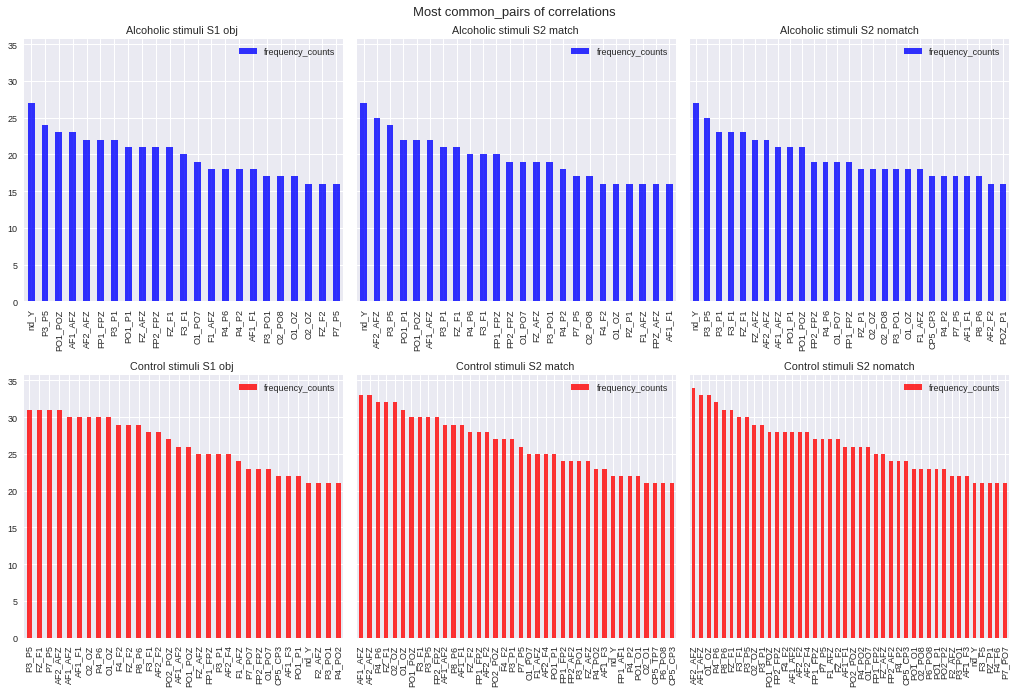

In [ ]:
from collections import Counter
fig,ax = plt.subplots(nrows=2,ncols=3,figsize=(15,10),sharey=True)
stimuli = ['S1 obj ', 'S2 match ','S2 nomatch']
al_pairs = []
co_pairs = []
for kk in range(3):
    row = kk // 3
    col = kk % 3
    _corrs_list_1 = []
    _corrs_list_2 = []
    df1 = pd.DataFrame()
    df2 = pd.DataFrame()
    for file1,file2 in zip(al_files_,co_files_):
        df_1 = pd.read_pickle(file1)
        df_2 = pd.read_pickle(file2)
        _corrs_list_1 = _corrs_list_1 + collect_corrs(df_1,0.9,stimuli[kk])
        _corrs_list_2 = _corrs_list_2 + collect_corrs(df_2,0.9,stimuli[kk])
    al_pairs.append(_corrs_list_1)
    co_pairs.append(_corrs_list_2)
    df1 = count_pairs(_corrs_list_1,15)
    df2 = count_pairs(_corrs_list_2,20)
    df1.plot(kind='bar',ax=ax[row,col],color = 'b',alpha=0.8)
    df2.plot(kind='bar',ax=ax[row+1,col],color = 'r',alpha = 0.8)
    ax[row,col].set_title('Alcoholic stimuli '+stimuli[col])
    ax[row+1,col].set_title('Control stimuli '+stimuli[col])
fig.suptitle('Most common_pairs of correlations')
fig.tight_layout(rect=[0.02,0.02,0.97,0.97])
plt.show()

From the bar chart, it is obvious that the pairs with most correlations are different for alcoholics and control. Now let us visualize that. We start with counting the pairs and then adding the frequency score to that particular channel. In the end we pass this score array containing number of correlations to the function for plotting headmaps.

In [ ]:
stimuli = ['S1 obj ', 'S2 match ','S2 nomatch']
chan_names = sensors.chan_name.unique()
volt_al = np.zeros([61,3])
volt_co = np.zeros([61,3])
for kk in range(3):
    row = kk // 3
    col = kk % 3
    _corrs_list_1 = []
    _corrs_list_2 = []
    print('stimulus ',stimuli[kk])
    for file1,file2 in zip(al_files_,co_files_):
        df_1 = pd.read_pickle(file1)
        df_2 = pd.read_pickle(file2)
        _corrs_list_1 = _corrs_list_1 + collect_corrs(df_1,0.9,stimuli[kk])
        _corrs_list_2 = _corrs_list_2 + collect_corrs(df_2,0.9,stimuli[kk])
    print('all pairs collected')
    counts_al = [[x,_corrs_list_1.count(x)] for x in set(_corrs_list_1)]
    counts_co = [[x,_corrs_list_1.count(x)] for x in set(_corrs_list_2)]
    for count1,count2 in zip(counts_al,counts_co):
        if not any(ele for ele in['X','Y','nd'] if ele in count1[0]):
            chan_id1 = count1[0].split('_')
            volt_al[list(chan_names).index(chan_id1[0]),kk] = volt_al[list(chan_names).
                                                                        index(chan_id1[0]),kk] + count1[1]
            volt_al[list(chan_names).index(chan_id1[1]),kk] = volt_al[list(chan_names).
                                                                        index(chan_id1[1]),kk] + count1[1]
        if not any(ele for ele in['X','Y','nd'] if ele in count2[0]):
            chan_id2 = count2[0].split('_')
            volt_co[list(chan_names).index(chan_id2[0]),kk] = volt_co[list(chan_names).
                                                                        index(chan_id2[0]),kk] + count2[1]
            volt_co[list(chan_names).index(chan_id2[1]),kk] = volt_co[list(chan_names).
                                                                        index(chan_id2[1]),kk] + count2[1]

stimulus  S1 obj 
all pairs collected
stimulus  S2 match 
all pairs collected
stimulus  S2 nomatch
all pairs collected


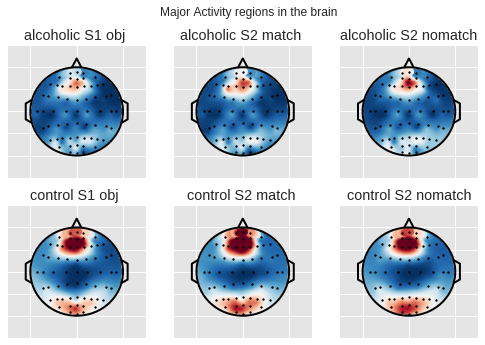

In [ ]:
stimulus = ['S1 obj ', 'S2 match ','S2 nomatch']
fig,axes = plt.subplots(2,3,figsize=(7,5), sharex=True, sharey=True)
for idx in range(6):
    row = idx// 3
    col = idx % 3
    if row >= 1:
        mask,xi,yi,zi = interpolate_mesh(sensors,volt_co[:,col])
        snapPlots = plot_head(axes[row,col],mask,xi,yi,zi,'control '+stimulus[col],sensors)
    elif row < 1:
        mask,xi,yi,zi = interpolate_mesh(sensors,volt_al[:,col])
        snapPlots = plot_head(axes[row,col],mask,xi,yi,zi,'alcoholic '+stimulus[col],sensors)


fig.suptitle('Major Activity regions in the brain')
fig.tight_layout(rect=[0,0.03,1,0.95])

The headmaps in the above plot is not representing averages but the regions of brain with maximum correlations. Red being high and blue been low. This can be interpreted as the major activity regions in the brain. For control subjects we see in general across the three stimuli that the brain activity is higher.

We find the correlations are different for alcoholics and control subjects. We also saw earlier that once you take average across all the epochs we fail to see significant difference in the voltage distributions of alcoholics and control. So now we are going to analyze the voltage distribution over certain epochs and see if they are any different for the two groups.

Following figure illustrates the same for a single stimuli - 'S1 obj'. We overplot the mean voltages for 40 subjects each from two groups across 10 different epochs.

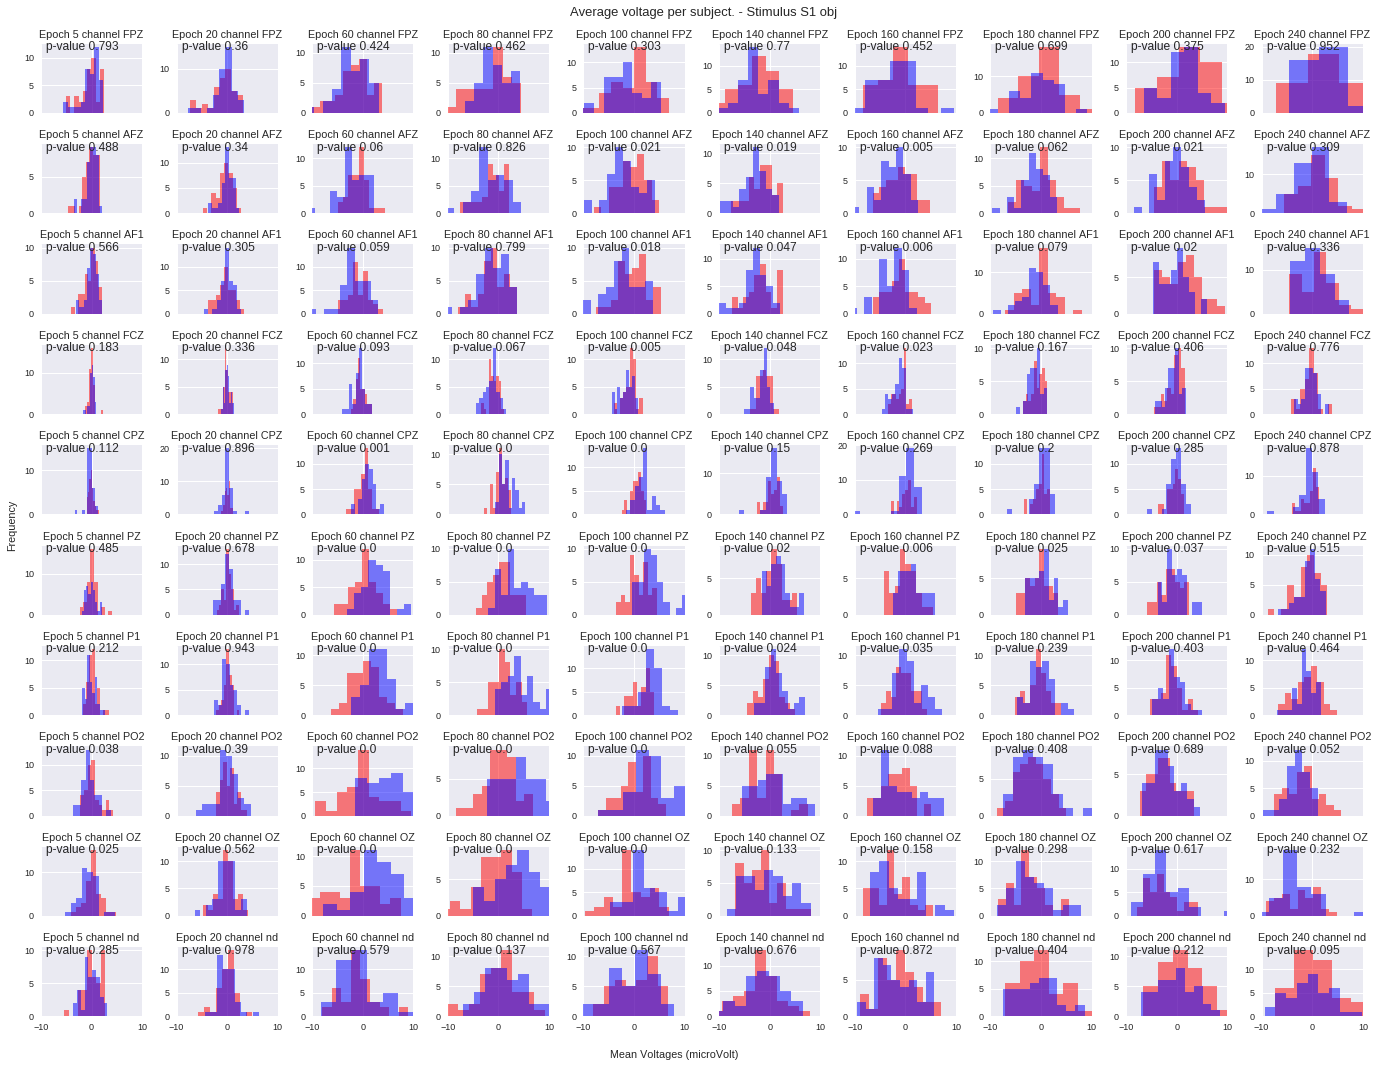

In [ ]:
epochs = [5,20,60,80,100,140,160,180,200,240]
fig,ax = plt.subplots(nrows=len(chan_names),ncols=len(epochs),figsize=(20,15),sharey=False,sharex=True)
for kk in range(100):
    row = kk // len(epochs)
    col = kk % len(epochs)
    al =  ax[row,col].hist(mean_arr1[0,kk,:],bins=9,  color='red', alpha=0.5,label='Alcoholics',normed = False)
    co = ax[row,col].hist(mean_arr2[0,kk,:],bins=9, color='blue', alpha=0.5,label='Control',normed = False)
    t, p = ttest_ind(mean_arr1[0,kk,:], mean_arr2[0,kk,:], equal_var=False)
    ax[row,col].text(0.05, 0.95,'p-value '+str(round(p,3)),
     horizontalalignment='left',
     verticalalignment='center',
     transform = ax[row,col].transAxes,
                fontsize=12)
    ax[row,col].set_title('Epoch '+str(epochs[col])+' channel '+chan_names[row])
    ax[row,col].set_xlim([-10,10])
fig.text(0.48,0.01,'Mean Voltages (microVolt)',ha='center',va='center')
fig.text(0.02,0.5,'Frequency',ha='center',va='center',rotation='vertical')
fig.suptitle('Average voltage per subject. - Stimulus S1 obj')
fig.tight_layout(rect=[0.02,0.02,0.97,0.97])
plt.show()

Some particular time points show better differentiability signified by their low p-values.

Let's do this for all the stimulus and plot the result in the form of a graph.

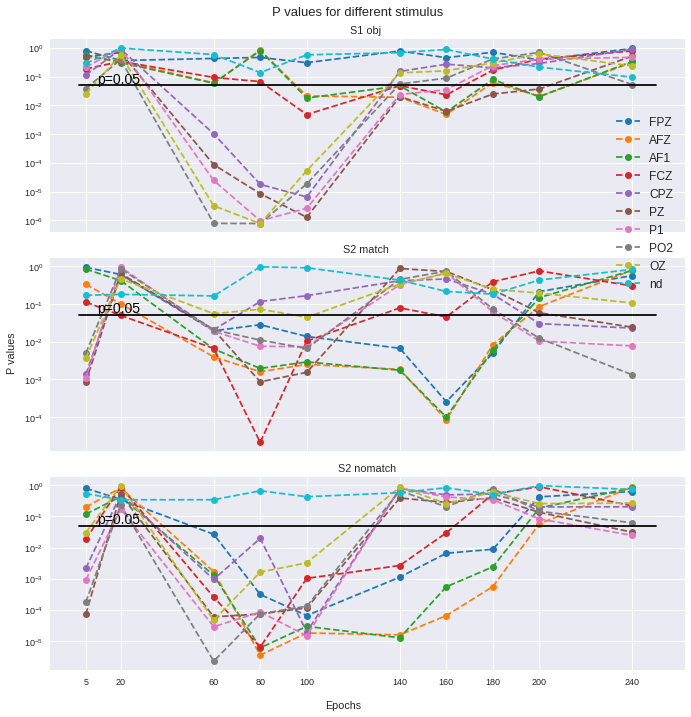

In [ ]:
fig,ax = plt.subplots(nrows=len(stimuli),ncols=1,figsize=(10,10),sharey=False,sharex=True)
colors = [cm.tab10(aColor) for aColor in np.linspace(0,1,len(chan_names))]

p = np.zeros([len(chan_names),len(epochs)])

x = np.linspace(2,250,100)
y = [0.05] * 100
for ll,stimulus in enumerate(stimuli):
    handles = []
    for kk in range(len(chan_names)*len(epochs)):
        row = kk // len(epochs)
        col = kk % len(epochs)
        t, p[row,col] = ttest_ind(mean_arr1[ll,kk,:], mean_arr2[ll,kk,:], equal_var=False)
    for row in range(len(chan_names)):
            lineHandle,= ax[ll,].plot(epochs,p[row,:],'--o',color=colors[row])
            handles.append(lineHandle)

    ax[ll,].plot(x,y,'k-')

    ax[ll,].set_yscale('log')
    ax[ll,].text(10,0.06,'p=0.05',fontsize=14,color='k')
    ax[ll,].set_title(stimuli[ll])
    ax[2,].set_xticks(epochs)
    ticks = ax[2,].get_xticks()
    ax[2,].set_xticklabels(epochs)

fig.text(0.48,0.01,'Epochs',ha='center',va='center')
fig.text(0.02,0.5,'P values',ha='center',va='center',rotation='vertical')
fig.legend(handles,labels=chan_names,loc='upper right',
           fontsize=12,
          bbox_to_anchor=[0.95,0.85])
fig.tight_layout(rect=[0.02,0.02,0.97,0.97])
fig.suptitle('P values for different stimulus')
plt.show()

Certain epochs show p-values below the significance level alpha. These timepoints could be a good indicator that the voltage distributions might be different for alcoholics and control after each stimulus.

In [ ]:
def create_headmap_avg(stimuli,chan_names,epochs,al_files_,co_files_):
    mean_arr1 = np.zeros((len(stimuli),len(chan_names)*len(epochs),len(al_files_)))
    mean_arr2 = np.zeros((len(stimuli),len(chan_names)*len(epochs),len(co_files_)))
for ii,epoch in enumerate(epochs):
    for idx,(file1,file2) in enumerate(zip(al_files_,co_files_)):

    df_1 = pd.read_pickle(file1)
    df_2 = pd.read_pickle(file2)
    print('loading file '+file1+' '+file2)
    epoch_voltage_per_epoch_al,subId = avgVolt_stimulus(df_1,sensors,epoch)
    epoch_voltage_per_epoch_co,subId = avgVolt_stimulus(df_2,sensors,epoch)
    for ii in range(3):
        mean_arr1[ii,:,idx] = epoch_voltage_per_epoch[:,ii]
        mean_arr2[ii,:,idx] = epoch_voltage_per_epoch[:,ii]



        for ii,epoch in enumerate(epochs):
             avgVolt_stimulus(df_1,sensorData,epoch)

    return mean_arr1,mean_arr2

In [ ]:
os.chdir(main_dir+'plots')
chan_names = sensors.chan_name.unique()
stimulus = ['S1 obj ', 'S2 match ','S2 nomatch']
epochs = list(range(0,256,10))
for epoch in tqdm_notebook(epochs,desc='Epoch loop',position=1):
    mean_arr1 = np.zeros((len(stimuli),len(chan_names),len(al_files_)))
    mean_arr2 = np.zeros((len(stimuli),len(chan_names),len(co_files_)))
    for idx,(file1,file2) in tqdm_notebook(enumerate(zip(al_files_,co_files_)),total=len(al_files_),desc='File loop',
                                       leave=False,position=2):
        df_1 = pd.read_pickle(file1)
        df_2 = pd.read_pickle(file2)
        #print('loading file '+file1+' '+file2)
        epoch_voltage_per_epoch_al,subId = avgVolt_stimulus(df_1,sensors,epoch)
        epoch_voltage_per_epoch_co,subId = avgVolt_stimulus(df_2,sensors,epoch)
        for ii in range(3):
            mean_arr1[ii,:,idx] = epoch_voltage_per_epoch_al[:,ii]
            mean_arr2[ii,:,idx] = epoch_voltage_per_epoch_co[:,ii]

    fig,axes = plt.subplots(2,3,figsize=(7,5), sharex=True, sharey=True)
    for idx in range(6):
        row = idx// 3
        col = idx % 3
        mins = [np.min(np.mean(mean_arr1[col,:,:],axis=1)),np.min(np.mean(mean_arr2[col,:,:],axis=1))]
        maxs = [np.max(np.mean(mean_arr1[col,:,:],axis=1)),np.max(np.mean(mean_arr2[col,:,:],axis=1))]
        if row >= 1:
            voltmatrix_co = np.mean(mean_arr2[col,:,:],axis=1)
            mask,xi,yi,zi = interpolate_mesh(sensors,voltmatrix_co[:])
            snapPlots = plot_head(axes[row,col],mask,xi,yi,zi,'control '+stimulus[col],
                                  sensors,np.min(mins),np.max(maxs))
        elif row < 1:
            voltmatrix_al = np.mean(mean_arr1[col,:,:],axis=1)
            mask,xi,yi,zi = interpolate_mesh(sensors,voltmatrix_al[:])
            snapPlots = plot_head(axes[row,col],mask,xi,yi,zi,'alcoholic '+stimulus[col],
                                  sensors,np.min(mins),np.max(maxs))


    fig.suptitle('Voltage maps for collection of subjects Epoch- '+str(epoch).zfill(4))
    fig.tight_layout(rect=[0,0.03,1,0.95])
    fig.savefig('Voltage_map_for_entire_group_'+str(epoch).zfill(4)+'.png')
    fig.clear()

clear_output()

In [ ]:
images_ = [file for file in glob.glob('Voltage_map_for_entire_group_*')]
sorted_images_ = sort_images(images_,5)
im_arr_ = create_imarr(sorted_images_)

In [ ]:
#plot_movie_js(im_arr_) #you've to rerun the notebook to start the slideshow

Clearly certain epochs show very different voltage distributions for alcoholics and control group; esp epochs 5,10,20,30,50,60,170

# ML to predict subject behaviour.

Since alcoholics and control subjects show different 'pronounced' correlations and distinguishable mean voltages corresponding to certain epochs, let's see if we can predict subject behaviour just by looking at their eeg scans.
For that we need to create feature vectors which will do a good job in differentiating the two categories.

In [ ]:
def prominent_pairs(alFiles,coFiles,stimuli):
    al_pairs = []
    co_pairs = []
    for kk in range(3):
        _corrs_list_1 = []
        _corrs_list_2 = []
        for file1,file2 in zip(alFiles,coFiles):
            df_1 = pd.read_pickle(file1)
            df_2 = pd.read_pickle(file2)
            _corrs_list_1 = _corrs_list_1 + collect_corrs(df_1,0.9,stimuli[kk])
            _corrs_list_2 = _corrs_list_2 + collect_corrs(df_2,0.9,stimuli[kk])
        counts_al = [[x,_corrs_list_1.count(x)] for x in set(_corrs_list_1)]
        counts_co = [[x,_corrs_list_2.count(x)] for x in set(_corrs_list_2)]

        al_pairs.append([pair[0] for pair in counts_al if pair[1]>=5])
        co_pairs.append([pair[0] for pair in counts_co if pair[1]>=5])
    print('All complete.')
    return al_pairs,co_pairs

In [ ]:
def stack_meanVolt(subject_file,mean_arr,stimulus_epochs,stimulus_chans,stimuli_pairs,file_id):
    """
        Function to extract mean volts and correlation for a single stimuli. This function will
        be recursively called to create feature vectors for a subject.
    """
    stimuliName = ['S1 obj ', 'S2 match ','S2 nomatch']
    full_epochs = epochs = [5,10,20,30,60,80,100,140,160,170,180,200,240]
    full_chans = ['FPZ','AFZ','AF1','FCZ','CPZ','PZ','P1','PO2','OZ','nd']
    row_values = []
    for s_id,stimulus in enumerate(stimuliName):
        epochs = stimulus_epochs[s_id]
        channels = stimulus_chans[s_id]
        pairs = stimuli_pairs[s_id]
        for chanel in channels:
            chan_id = full_chans.index(chanel)
            for epoch in epochs :
                epoch_id = full_epochs.index(epoch)
                voltages_mean = mean_arr[s_id,epoch_id+(chan_id*len(full_epochs)),file_id].tolist()
                row_values.extend([voltages_mean])

        chanMat_ = create_chanMat(pd.read_pickle(subject_file),stimulus)
        for pair in pairs:
            row_values.extend([chanMat_.corr().at[pair.split('_')[0],pair.split('_')[1]]])

    return row_values


In [ ]:
def create_featureVecs(subject_files,mean_array_of_sub,sub_group,al_pairs,co_pairs):
    """
        This function will create feature vectors for each individual subjects and append the row
        to a 2D numpy array. The epochs and channels for which the data need to be collected is separately
        defined for each stimulus."""
    s1_epochs = [5,10,30,60,80,100,170]
    s1_chans = ['FCZ','CPZ','PZ','P1','PO2','OZ']
    s2_epochs = [5,10,30,60,80,100,140,160,170,240]
    s2_chans = ['FPZ','AFZ','AF1','FCZ','PZ','P1','PO2']
    s3_epochs = [5,10,60,80,100,140,160]
    s3_chans = ['FPZ','AFZ','FCZ','CPZ','PZ','P1','PO2','OZ']
    s_chans = [s1_chans,s2_chans,s3_chans]
    s_epochs = [s1_epochs,s2_epochs,s3_epochs]
    s_pairs=[list(set(al_pairs[0]+co_pairs[0])), list(set(al_pairs[1]+co_pairs[1])), list(set(al_pairs[2]+co_pairs[2]))]
    feature_vecLen = 0
    for pairs,chans,epochs in zip(s_pairs,s_chans,s_epochs):
        feature_vecLen += len(pairs)+len(chans)*len(epochs)

    feature_vectors = np.zeros([len(subject_files),feature_vecLen])

    for idx,file in tqdm_notebook(enumerate(subject_files),desc='Files completed',total = len(subject_files)):

        arr = stack_meanVolt(file, mean_array_of_sub, s_epochs,s_chans,s_pairs,idx)
        feature_vectors[idx,:] = arr

    if sub_group == 'a':
        feature_vectors = np.c_[feature_vectors, np.ones(len(subject_files))]
    elif sub_group == 'c':
        feature_vectors = np.c_[feature_vectors, np.zeros(len(subject_files))]

    return feature_vectors


Create feature vectors for alcoholics and control.

In [ ]:
stimulus = ['S1 obj ', 'S2 match ','S2 nomatch']
al_pairs,co_pairs = prominent_pairs(al_files_,co_files_,stimulus)

In [ ]:
feature_vector_al = create_featureVecs(al_files_,multiD_arr_al,'a',al_pairs,co_pairs)
feature_vector_co = create_featureVecs(co_files_,multiD_arr_co,'c',al_pairs,co_pairs)
np.save('featureVec_al',feature_vector_al)
np.save('featureVec_co',feature_vector_co)

In [ ]:
feature_vector_co = create_featureVecs(co_files_,mean_arr2,'c',al_pairs,co_pairs)

In [ ]:
feature_vector_co.shape # each subject has 622 features

(40, 623)

Save the feature vectors for future use.

In [ ]:
np.save('featureVec_al',feature_vector_al)
np.save('featureVec_co',feature_vector_co)

Import libraries from Scikit -learn for machine learning.

In [ ]:
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import  train_test_split
from sklearn import metrics
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

Create training array by taking 20 entries each from alcoholics and control, while test array will have 10 each from each group.Thus training set will have 40 entries and test set will have 20 entries.

In [ ]:
# load saves feature vectors from the disk
csv_dir = os.path.join(main_dir+'/eeg_(csv&pkl)')
#os.chdir(csv_dir)
feature_vector_al = np.load(csv_dir+'/featureVec_al.npy')
feature_vector_co = np.load(csv_dir+'/featureVec_co.npy')

Stack feature vectors of alcoholics and controls and separate out the target vectors.

In [ ]:
X = np.vstack((feature_vector_al[:,:-1],feature_vector_co[:,:-1]))
y = np.hstack((feature_vector_al[:,-1],feature_vector_co[:,-1]))

In [ ]:
X_ = np.nan_to_num(X)  # precaution to remove any nan values.

In [ ]:
# split into train and test set in 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X_,y,test_size = 0.2 , random_state = 0)

In [ ]:
print('Dimension of training dataset - {} rows {} columns'.format(X_train.shape[0],X_train.shape[1]))
print('Dimension of test dataset - {} rows {} columns'.format(X_test.shape[0],X_test.shape[1]))

Dimension of training dataset - 64 rows 622 columns
Dimension of test dataset - 16 rows 622 columns


In [ ]:
scaler = preprocessing.StandardScaler()     # use feature-scaling to standardize values.
X_ = scaler.fit_transform(X_)

Since the data is less, we do a cross-validation exercise to prevent tuning of hyperparameters.
Cross-val score method of doing cross-valuation.

In [ ]:
from sklearn.model_selection import cross_val_score
clf = linear_model.LogisticRegression()
scores = cross_val_score(clf, X_train, y_train, cv=3, scoring='f1_macro') #balance target classes
print('Accuracy: %0.2f(+/- %0.2f)' % (scores.mean(),scores.std()*2))

Accuracy: 0.82(+/- 0.16)


Using stratified cross validation because we don't want our model to train on an unbalanced mix of labels.

In [ ]:
skf = StratifiedKFold(n_splits=3,shuffle=True)
acc = np.array([])               # take n folds
for train_idx, test_idx in skf.split(X_train,y_train):
    X_train_cv,X_test_cv = X_train[train_idx], X_train[test_idx]
    y_train_cv,y_test_cv = y_train[train_idx], y_train[test_idx]
    clf = linear_model.LogisticRegression()
    clf.fit(X_train_cv,y_train_cv)
    y_pred = (clf.predict(X_test_cv))
    acc = np.append(acc,metrics.accuracy_score(y_test_cv,y_pred))
print('Accuracy: %0.2f(+/- %0.2f)' %(acc.mean(),acc.std()*2))

Accuracy: 0.84(+/- 0.09)


Let's use this classifer to label the test set.

In [ ]:
y_ = clf.predict(X_test)
print('Accuracy for test set is: {:.2}'.format(metrics.accuracy_score(y_test,y_)))
print('Logistic Regression:\n {}\n'.format(metrics.classification_report(y_test,y_)))

Accuracy for test set is: 0.81
Logistic Regression:
              precision    recall  f1-score   support

        0.0       0.91      0.83      0.87        12
        1.0       0.60      0.75      0.67         4

avg / total       0.83      0.81      0.82        16




Not bad, we correctly labeled more than 80% of samples.

On plotting the confusion matrix we see that the model performs quiet well in figuring out control subjects in comparison to alcoholics.

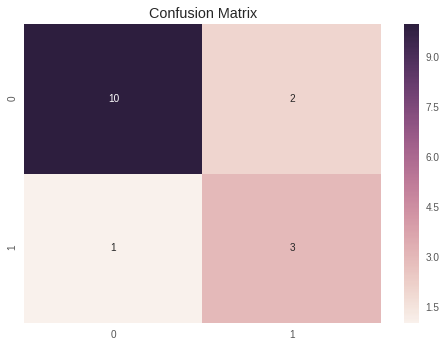

In [ ]:
logistics_conf_mat = metrics.confusion_matrix(y_test,y_)
sns.heatmap(logistics_conf_mat, annot=True)
plt.title('Confusion Matrix')

Now let's see how much accuracy can be achieved by random guessing, say first 8 are alcoholics and rest from control subjects.

In [ ]:
print('Accuracy achieved by random guessing is: {:.2}'.format(metrics.accuracy_score(y_test,[1]*8 + [0]*8)))
print('Logistic Regression:\n {}\n'.format(metrics.classification_report(y_test,[1]*8 + [0]*8)))

Accuracy achieved by random guessing is: 0.5
Logistic Regression:
              precision    recall  f1-score   support

        0.0       0.75      0.50      0.60        12
        1.0       0.25      0.50      0.33         4

avg / total       0.62      0.50      0.53        16




Clearly a machine learning approach aided by smart feature selection does much better.

---

# Conclusion

A detailed analysis is carried out on the eeg scan data of Alcoholics and control. After the data is parsed from text files the data is stored in the disk in the form of csv or pickle files.
<br>
To see the differences between alcoholics and control we started off with surface plots one entire recording for one randomly selected subject. Later we generalized to include the average over all the trials of the subject, for different stimulus. Some differences were seen in the voltage distribution in these plots.
<br>
We then visualize the voltages using headmaps to see which part of brain are active for alcoholic subject and the control subject.
<br>
Calculating correlations will help to understand which pairs of sensors are 'firing' together for alcoholics and control.
The correlations are plotted in the form of a graph. A plot of headmaps for different stimulus is plotted, in which the colormap represent the most active pairs of eeg sensors.
<br>
Armed with this information feature vectors are created encoding information about the average voltages for certain channels and certain epochs. The aim is to try and distinguish alcoholics and control subjects. A simple linear regression model is trained and tested on a test set. Accuracy upto 85% is attained.

<br>
This show that it is technically possible to predict whether a subject is alcoholic or not with a fair amount of accuracy using simple machine learning models.
It can happen that it is just spurious feature of this dataset and nothing conclusive could be said due to the limited size of the data, but warrants further attention by researchers.